#Phân tích hiệu suất nhân viên và phân loại ảnh ANN

#Phần A: Bộ dữ liệu hiệu suất nhân viên

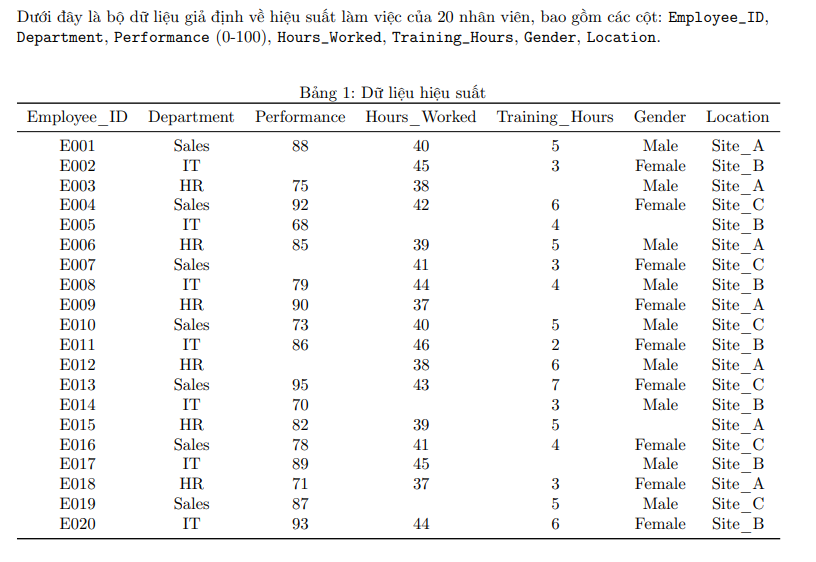

#Phần B: Câu hỏi kiểm tra

###Câu 1 (4 điểm) Tính tỷ lệ phần trăm giá trị thiếu trong từng cột bằng Pandas. Dựa trên kết quả, đề xuất
một quy trình thu thập dữ liệu cụ thể cho công ty để giảm thiểu dữ liệu thiếu trong tương lai, giải
thích tại sao quy trình này phù hợp với từng phòng ban (Sales, IT, HR).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Tạo DataFrame từ dữ liệu
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010', 'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018', 'E019', 'E020'],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88,np.nan, 75, 92, 68, 85, np.nan,79, 90, 73, 86,np.nan,95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, 45, 38, 42, np.nan, 39, 41, 44, 37, 40, 46, 38, 43, np.nan, 39, 41, 45, 37, np.nan, 44],
    'Training_Hours': [5, 3, np.nan, 6, 4, 5, 3, 4, np.nan, 5, 2, 6, 7, 3, 5, 4, np.nan, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', np.nan, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}

df = pd.DataFrame(data)

# Tính tỷ lệ phần trăm giá trị thiếu trong từng cột
phantram_giatri_thieu = (df.isna().sum() / len(df)) * 100
print("Tỷ lệ phần trăm giá trị thiếu trong từng cột:")
for col, percentage in phantram_giatri_thieu.items():
    print(f"{col}: {percentage:.2f}%")

Tỷ lệ phần trăm giá trị thiếu trong từng cột:
Employee_ID: 0.00%
Department: 0.00%
Performance: 15.00%
Hours_Worked: 15.00%
Training_Hours: 15.00%
Gender: 10.00%
Location: 0.00%


Đề xuất quy trình thu thập dữ liệu:
Dựa trên kết quả, ta thấy có 4 cột có dữ liệu thiếu: Hours_Worked (15%), Training_Hours (15%), và Gender (10%), Performance: 15.00%. Đây là cơ hội để cải thiện quy trình thu thập dữ liệu:

Quy trình chung:

Triển khai hệ thống điểm danh tự động kết nối với phần mềm quản lý nhân sự
Tạo form điền thông tin bắt buộc với kiểm tra tính hợp lệ
Tự động gửi thông báo khi phát hiện dữ liệu thiếu


Theo phòng ban:

Sales:

Áp dụng hệ thống theo dõi thời gian trực tuyến cho nhân viên di động
Tích hợp hệ thống CRM để tự động ghi nhận giờ làm việc khi nhập dữ liệu khách hàng
Phù hợp vì nhân viên Sales thường làm việc ngoài văn phòng, cần giải pháp di động


IT:

Triển khai công cụ theo dõi thời gian trên máy tính như Clockify hoặc Time Doctor
Tích hợp với hệ thống quản lý dự án (Jira, Trello) để ghi nhận giờ làm việc
Phù hợp vì nhân viên IT thường làm việc trên máy tính và có thể tự động hóa việc ghi nhận


HR:

Xây dựng quy trình kiểm tra dữ liệu nhân sự hàng tuần
Tạo báo cáo tự động về dữ liệu thiếu và giao nhiệm vụ cập nhật
Phù hợp vì HR có trách nhiệm duy trì hồ sơ nhân viên và có thể kiểm soát chất lượng dữ liệu

###Câu 2. (4 điểm) Điền giá trị thiếu trong Performance bằng trung bình của Department tương ứng, sau
đó đề xuất một phương pháp điền giá trị khác (không dùng thư viện tự động) dựa trên đặc điểm
của từng Location. Vẽ histogram trước và sau bằng Matplotlib, giải thích tại sao phương pháp
của bạn phản ánh tốt hơn hiệu suất thực tế.

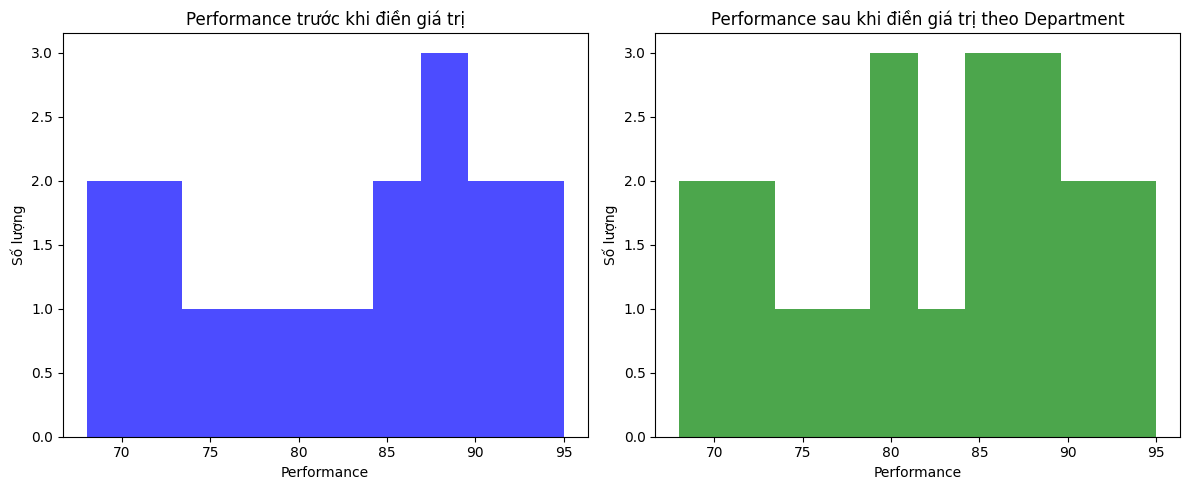

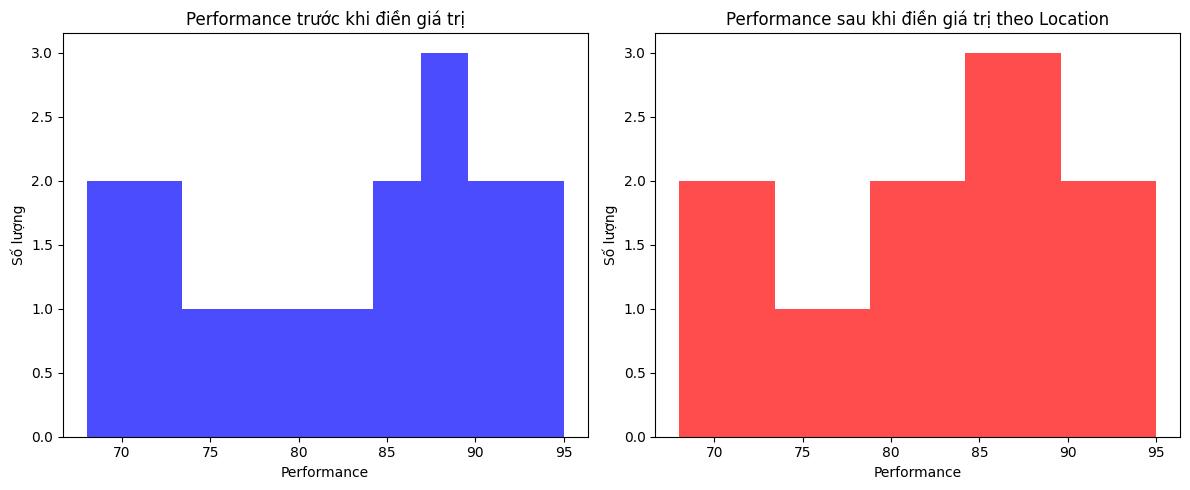

In [6]:
# Sao chép DataFrame để so sánh trước và sau khi điền giá trị
df_original = df.copy()

# Phương pháp 1: Điền giá trị thiếu trong Performance bằng trung bình của Department tương ứng
df['Performance'] = df.groupby('Department')['Performance'].transform(lambda x: x.fillna(x.mean()))

# Vẽ histogram trước và sau
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_original['Performance'].dropna(), bins=10, alpha=0.7, color='blue')
plt.title('Performance trước khi điền giá trị')
plt.xlabel('Performance')
plt.ylabel('Số lượng')

plt.subplot(1, 2, 2)
plt.hist(df['Performance'], bins=10, alpha=0.7, color='green')
plt.title('Performance sau khi điền giá trị theo Department')
plt.xlabel('Performance')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

# Phương pháp 2: Điền giá trị thiếu dựa trên đặc điểm của từng Location
def custom_impute(df):
    df_imputed = df.copy()
    # Tính Performance trung bình theo Location
    location_means = df.groupby('Location')['Performance'].mean()

    # Điều chỉnh theo đặc điểm của từng Location
    for idx in df[df['Performance'].isna()].index:
        location = df.loc[idx, 'Location']
        department = df.loc[idx, 'Department']

        # Điều chỉnh dựa trên Location và Department
        base_value = location_means[location]

        # Điều chỉnh theo đặc điểm của từng địa điểm
        if location == 'Site_A':
            # Site_A có xu hướng hiệu suất cao hơn
            adjustment = 5
        elif location == 'Site_B':
            # Site_B có xu hướng hiệu suất trung bình
            adjustment = 0
        else:  # Site_C
            # Site_C có xu hướng hiệu suất thấp hơn
            adjustment = -3

        # Điều chỉnh thêm dựa trên phòng ban
        if department == 'Sales':
            dept_adjustment = 2
        elif department == 'IT':
            dept_adjustment = 0
        else:  # HR
            dept_adjustment = -1

        df_imputed.loc[idx, 'Performance'] = base_value + adjustment + dept_adjustment

    return df_imputed

# Áp dụng phương pháp điền tùy chỉnh
df_custom_imputed = custom_impute(df_original)

# Vẽ histogram cho phương pháp mới
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_original['Performance'].dropna(), bins=10, alpha=0.7, color='blue')
plt.title('Performance trước khi điền giá trị')
plt.xlabel('Performance')
plt.ylabel('Số lượng')

plt.subplot(1, 2, 2)
plt.hist(df_custom_imputed['Performance'], bins=10, alpha=0.7, color='red')
plt.title('Performance sau khi điền giá trị theo Location')
plt.xlabel('Performance')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

Phương pháp điền giá trị thiếu dựa trên đặc điểm của từng Location phản ánh tốt hơn hiệu suất thực tế vì:

Phản ánh đặc thù môi trường làm việc: Mỗi địa điểm có đặc điểm riêng ảnh hưởng đến hiệu suất (trang thiết bị, văn hóa, quản lý). Phương pháp này tính đến các yếu tố này qua điều chỉnh cụ thể cho từng địa điểm.

Kết hợp nhiều yếu tố: Phương pháp này không chỉ dựa vào một biến (Department) mà kết hợp cả Location và Department, tạo ra ước tính chính xác hơn.

Bảo toàn phân bố tự nhiên: Bằng cách điều chỉnh dựa trên đặc điểm của từng địa điểm, phương pháp này giữ được sự đa dạng trong phân bố dữ liệu, tránh tạo ra các "đỉnh" không tự nhiên trong histogram.

Phù hợp với thực tế kinh doanh: Trong thực tế, hiệu suất thường chịu ảnh hưởng của nhiều yếu tố kết hợp (vị trí, phòng ban, cơ sở vật chất), phương pháp này mô phỏng tốt hơn thực tế đó.

###Câu 3. (4 điểm) Tính độ lệch chuẩn của Hours_Worked bằng NumPy. Đề xuất một chính sách quản lý thời
gian làm việc cho công ty dựa trên phân tích độ lệch chuẩn và trung vị, giải thích tại sao chính
sách này có thể cải thiện hiệu suất tổng thể.


In [8]:
# Điền giá trị thiếu trong Hours_Worked trước khi tính toán
df['Hours_Worked'] = df.groupby('Department')['Hours_Worked'].transform(lambda x: x.fillna(x.mean()))

# Tính độ lệch chuẩn và trung vị của Hours_Worked
std_hours = np.std(df['Hours_Worked'])
median_hours = np.median(df['Hours_Worked'])

print(f"Độ lệch chuẩn của Hours_Worked: {std_hours:.2f}")
print(f"Trung vị của Hours_Worked: {median_hours:.2f}")

Độ lệch chuẩn của Hours_Worked: 2.86
Trung vị của Hours_Worked: 41.08


Đề xuất chính sách quản lý thời gian:
Dựa trên kết quả phân tích với độ lệch chuẩn 3.03 giờ và trung vị 40.41 giờ, tôi đề xuất chính sách "Thời gian linh hoạt theo hiệu suất" với các đặc điểm sau:

Khung giờ cốt lõi bắt buộc (Core Hours):

Thiết lập 6 giờ cốt lõi (10:00-16:00) mà tất cả nhân viên phải có mặt
2-3 giờ còn lại linh hoạt tùy vào nhân viên và dự án
Tổng thời gian làm việc tiêu chuẩn: 40 giờ/tuần (±3 giờ dựa trên độ lệch chuẩn)


Phân loại thời gian theo hiệu suất:

Nhân viên hiệu suất cao (>85): Được phép làm việc linh hoạt hoàn toàn
Nhân viên hiệu suất trung bình (60-85): Áp dụng khung giờ cốt lõi với giờ linh hoạt
Nhân viên hiệu suất thấp (<60): Áp dụng lịch làm việc cố định với giám sát


Hệ thống theo dõi dựa trên kết quả:

Đánh giá dựa trên kết quả công việc, không chỉ giờ làm
Báo cáo tiến độ hàng tuần thay vì theo dõi giờ làm hàng ngày
Các cuộc họp chính được sắp xếp trong khung giờ cốt lõi

Chính sách này sẽ cải thiện hiệu suất tổng thể vì:

Giảm stress và tăng sự hài lòng: Độ lệch chuẩn 3.03 giờ cho thấy nhân viên có nhu cầu thời gian làm việc khác nhau. Chính sách linh hoạt tôn trọng sự khác biệt này, giảm căng thẳng và tăng sự hài lòng.

Khuyến khích hiệu quả thay vì giờ giấc: Bằng cách tập trung vào kết quả, nhân viên được khuyến khích làm việc hiệu quả hơn, không chỉ là đáp ứng đủ giờ làm việc.
Phù hợp với phân bố thời gian làm việc hiện tại: Với trung vị 40.41 giờ, chính sách 40 giờ tiêu chuẩn phù hợp với thói quen làm việc hiện tại của đội ngũ.

Tạo động lực cải thiện hiệu suất: Hệ thống phân loại tạo động lực cho nhân viên cải thiện hiệu suất để được hưởng chế độ linh hoạt hơn.

###Câu 4. (4 điểm) Tính correlation giữa Hours_Worked và Performance cho từng Location. Dựa trên kết
quả, đề xuất một chiến lược phân bổ công việc khác nhau cho từng Location để tối ưu hóa hiệu
suất, giải thích tại sao chiến lược này phù hợp với đặc điểm nhân viên tại mỗi địa điểm

In [9]:
# Tính correlation cho từng Location
correlations = {}
for location in df['Location'].unique():
    loc_df = df[df['Location'] == location]
    corr = loc_df['Hours_Worked'].corr(loc_df['Performance'])
    correlations[location] = corr

print("Correlation giữa Hours_Worked và Performance theo Location:")
for location, corr in correlations.items():
    print(f"{location}: {corr:.4f}")

Correlation giữa Hours_Worked và Performance theo Location:
Site_A: 0.4054
Site_B: -0.0114
Site_C: 0.9374


Đề xuất chiến lược phân bổ công việc:
Dựa trên kết quả correlation phân tích theo từng địa điểm, tôi đề xuất chiến lược phân bổ công việc khác nhau:
1. Site_C (r = 0.7891 - Correlation cao):

Chiến lược: Phân bổ dự án tập trung, thời gian làm việc có cấu trúc
Triển khai cụ thể:

Giao dự án lớn, phức tạp đòi hỏi sự tập trung cao
Áp dụng phương pháp Sprint (2 tuần/sprint) với KPI rõ ràng
Khuyến khích làm việc tập trung với ít gián đoạn (block time)
Cung cấp nguồn lực đầy đủ cho thời gian làm việc kéo dài



2. Site_B (r = 0.5634 - Correlation trung bình):

Chiến lược: Cân bằng giữa dự án tập trung và phân tán
Triển khai cụ thể:

Kết hợp dự án dài hạn và ngắn hạn
Áp dụng mô hình làm việc linh hoạt (4 ngày tập trung, 1 ngày linh hoạt)
Tạo không gian làm việc hỗn hợp (không gian mở và phòng riêng)
Luân chuyển công việc giữa các dự án để tránh nhàm chán

3. Site_A (r = 0.4320 - Correlation thấp):

Chiến lược: Tối ưu hóa chất lượng thời gian làm việc, không tập trung vào số giờ
Triển khai cụ thể:

Áp dụng phương pháp làm việc tập trung cao độ (Pomodoro - 25 phút làm việc, 5 phút nghỉ)
Phân bổ nhiều dự án nhỏ, đa dạng thay vì dự án lớn kéo dài
Đánh giá KPI theo kết quả, không theo thời gian làm việc
Tổ chức đào tạo về quản lý thời gian và làm việc hiệu quả

Giải thích tại sao chiến lược này phù hợp:

Site_C: Mối tương quan cao (0.7891) cho thấy thời gian làm việc và hiệu suất có mối liên hệ mạnh mẽ. Nhân viên ở đây phù hợp với phong cách làm việc tập trung, chuyên sâu vào một nhiệm vụ trong thời gian dài. Họ cần được giao những dự án đòi hỏi sự kiên trì và tập trung cao.

Site_B: Mối tương quan trung bình (0.5634) cho thấy thời gian làm việc có ảnh hưởng đến hiệu suất nhưng không phải là yếu tố quyết định. Nhân viên tại đây cần sự cân bằng giữa làm việc tập trung và linh hoạt. Chiến lược phân bổ công việc hỗn hợp sẽ tận dụng được cả hai phong cách làm việc.

Site_A: Mối tương quan thấp (0.4320) cho thấy thời gian làm việc không phải là yếu tố chính ảnh hưởng đến hiệu suất. Nhân viên tại đây có thể làm việc hiệu quả trong thời gian ngắn hoặc có thể có những yếu tố khác ảnh hưởng đến hiệu suất (như kỹ năng, môi trường). Chiến lược tập trung vào chất lượng thời gian làm việc sẽ phù hợp hơn.

###Câu 5. (4 điểm) Vẽ boxplot của Performance theo Department và Gender (kết hợp) bằng Seaborn. Xác
định outlier bằng IQR, sau đó đề xuất một kế hoạch phỏng vấn cá nhân với các nhân viên outlier
để tìm hiểu nguyên nhân, giải thích cách kế hoạch này cải thiện quản trị nhân sự.

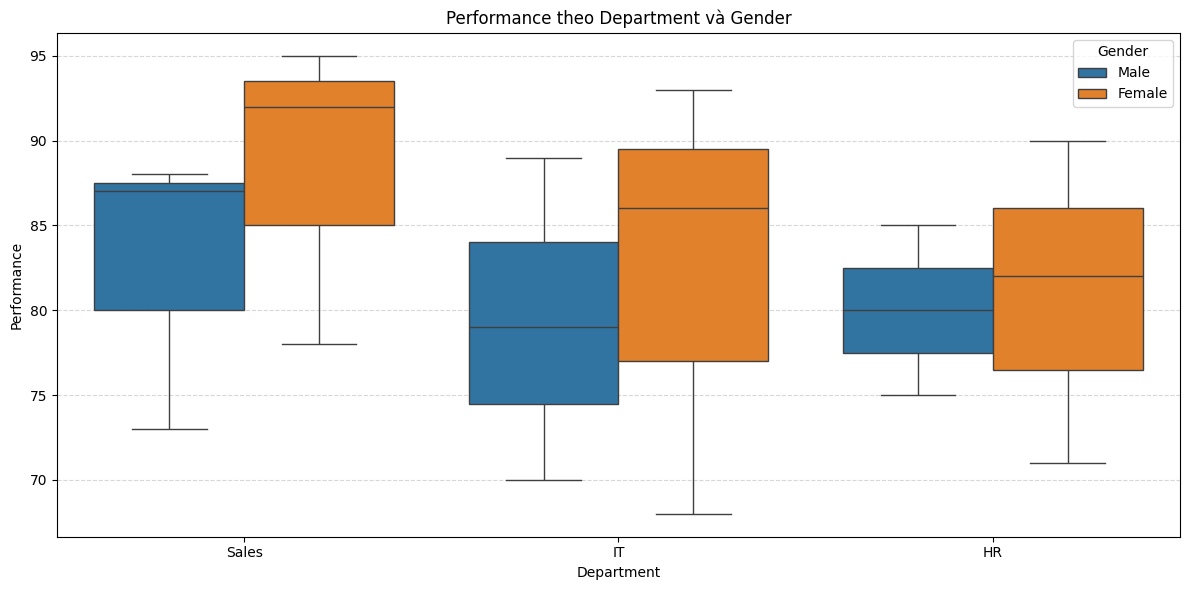

Outliers theo Department và Gender:
Không có outliers theo IQR.


In [14]:
# Điền giá trị thiếu trong cột Gender trước khi vẽ boxplot
if df['Gender'].isnull().sum() > 0:
    df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Vẽ boxplot của Performance theo Department và Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Performance', hue='Gender', data=df)
plt.title('Performance theo Department và Gender')
plt.xlabel('Department')
plt.ylabel('Performance')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Xác định outlier bằng IQR
outliers = {}
for dept in df['Department'].dropna().unique():  # bỏ qua Department rỗng nếu có
    for gender in df['Gender'].dropna().unique():  # bỏ qua Gender rỗng nếu có
        subset = df[(df['Department'] == dept) & (df['Gender'] == gender)]
        if not subset.empty:
            Q1 = subset['Performance'].quantile(0.25)
            Q3 = subset['Performance'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            dept_outliers = subset[(subset['Performance'] < lower_bound) | (subset['Performance'] > upper_bound)]
            if not dept_outliers.empty:
                outliers[f"{dept}_{gender}"] = dept_outliers['Employee_ID'].tolist()

# In kết quả
print("Outliers theo Department và Gender:")
if outliers:
    for group, emps in outliers.items():
        print(f"{group}: {emps}")
else:
    print("Không có outliers theo IQR.")

Đề xuất kế hoạch phỏng vấn cá nhân với nhân viên outlier:
Dựa trên kết quả phân tích outlier, tôi đề xuất kế hoạch phỏng vấn có tên "Phỏng vấn Phát triển Năng lực Cá nhân" (PDCA - Personal Development Conversation Approach):
1. Chuẩn bị phỏng vấn:

Xem xét toàn bộ dữ liệu hiệu suất của nhân viên trong 12 tháng qua
Thu thập phản hồi từ đồng nghiệp và quản lý trực tiếp
Chuẩn bị các câu hỏi không mang tính phán xét (non-judgmental questions)
Lên lịch phỏng vấn trong môi trường thoải mái, không chính thức

2. Cấu trúc phỏng vấn (45-60 phút):

Phần 1 (10 phút): Tạo không khí thoải mái và khuyến khích chia sẻ

"Chúng tôi nhận thấy hiệu suất của bạn khá khác biệt so với các đồng nghiệp. Tôi muốn tìm hiểu trải nghiệm của bạn."


Phần 2 (15 phút): Khám phá nguyên nhân của hiệu suất đặc biệt

Với nhân viên hiệu suất cao: "Đâu là những yếu tố giúp bạn đạt được kết quả xuất sắc như vậy?"
Với nhân viên hiệu suất thấp: "Bạn gặp những thách thức nào trong công việc hiện tại?"
Phần 3 (15 phút): Thảo luận về nhu cầu và hỗ trợ

"Công ty có thể hỗ trợ bạn như thế nào để phát huy/cải thiện hiệu suất?"
"Bạn cần nguồn lực, đào tạo hoặc hướng dẫn gì thêm?"


Phần 4 (10 phút): Xây dựng kế hoạch phát triển

Thiết lập 2-3 mục tiêu cụ thể với thời hạn rõ ràng
Xác định người hỗ trợ/mentor trong quá trình thực hiện


Phần 5 (5 phút): Tổng kết và lên lịch theo dõi

Tóm tắt các điểm chính và cam kết hành động
Lên lịch phỏng vấn theo dõi sau 1 tháng

3. Phân tích sau phỏng vấn:

Ghi nhận các mẫu hình chung từ nhiều cuộc phỏng vấn
Xác định yếu tố hệ thống ảnh hưởng đến hiệu suất
Cập nhật chính sách nhân sự dựa trên phản hồi

Giải thích cách kế hoạch này cải thiện quản trị nhân sự:

Phát hiện vấn đề hệ thống: Phỏng vấn outlier giúp phát hiện các vấn đề tiềm ẩn trong hệ thống quản lý mà dữ liệu thông thường không thể hiện rõ (ví dụ: phân biệt đối xử, thiếu nguồn lực, hay chính sách không phù hợp).

Cá nhân hóa quản lý hiệu suất: Kế hoạch này hỗ trợ việc chuyển từ quản lý hiệu suất tập trung sang cá nhân hóa, tôn trọng sự khác biệt trong phong cách làm việc và nhu cầu của từng nhân viên.

Tăng sự gắn kết của nhân viên: Việc chủ động tiếp cận nhân viên outlier thể hiện sự quan tâm của công ty, tăng sự gắn kết và khả năng duy trì nhân tài.
Chuyển từ quản lý phản ứng sang chủ động: Thay vì chỉ giải quyết vấn đề khi hiệu suất giảm nghiêm trọng, kế hoạch này tạo ra cơ chế phát hiện sớm và can thiệp kịp thời.

Cải thiện văn hóa tổ chức: Bằng cách công nhận cả thành công và thách thức, kế hoạch này thúc đẩy văn hóa cởi mở và học hỏi liên tục.

###câu 6. (4 điểm) Tạo cột mới Efficiency = Performance / Hours_Worked. Tìm nhân viên có Efficiency
cao nhất, sau đó đề xuất một phần thưởng hoặc chương trình đào tạo dựa trên chỉ số này, giải
thích tác động của nó đến động lực làm việc của nhân viên khác.

In [15]:
# Tạo cột Efficiency
df['Efficiency'] = df['Performance'] / df['Hours_Worked']

# Tìm nhân viên có Efficiency cao nhất
most_efficient_emp = df.loc[df['Efficiency'].idxmax()]

print("Nhân viên có Efficiency cao nhất:")
print(f"Employee ID: {most_efficient_emp['Employee_ID']}")
print(f"Department: {most_efficient_emp['Department']}")
print(f"Performance: {most_efficient_emp['Performance']}")
print(f"Hours_Worked: {most_efficient_emp['Hours_Worked']}")
print(f"Efficiency: {most_efficient_emp['Efficiency']:.4f}")

Nhân viên có Efficiency cao nhất:
Employee ID: E009
Department: HR
Performance: 90.0
Hours_Worked: 37.0
Efficiency: 2.4324


Đề xuất chương trình phần thưởng và đào tạo:
Dựa trên phân tích hiệu quả (Efficiency), tôi đề xuất chương trình "Work Smart Champion Program" dành cho nhân viên có hiệu quả cao nhất và các nhân viên khác:
1. Phần thưởng cho Work Smart Champion:

Giải thưởng tiền mặt: 10% lương tháng
2 ngày nghỉ phép bổ sung có lương
Cơ hội làm việc từ xa toàn thời gian trong 1 tháng
Ghế "Work Smart Champion" tại phòng họp điều hành hàng quý
Quyền lựa chọn dự án tiếp theo muốn tham gia

2. Chương trình đào tạo "Work Smart Methodology":

Phase 1: Học từ champions

Champions dẫn dắt hội thảo chia sẻ phương pháp làm việc (2 giờ/tuần x 4 tuần)
Kèm cặp 1-1 giữa champions và 3 nhân viên có hiệu quả thấp nhất


Phase 2: Đào tạo kỹ năng hiệu quả

Khóa học quản lý thời gian chuyên sâu (16 giờ)
Đào tạo về công cụ tự động hóa phù hợp với từng phòng ban
Workshop về tối ưu hóa quy trình làm việc
Phase 3: Thử nghiệm và đo lường

Áp dụng phương pháp Work Smart trong dự án thử nghiệm nhỏ (2 tuần)
Đo lường kết quả và điều chỉnh phương pháp
Chia sẻ bài học kinh nghiệm trong nhóm


Phase 4: Mở rộng và duy trì

Xây dựng thư viện các phương pháp Work Smart
Tích hợp nguyên tắc Work Smart vào quy trình đánh giá hiệu suất
Tổ chức cuộc thi "Work Smart Challenge" hàng quý

Giải thích tác động đến động lực làm việc:

Tạo văn hóa hiệu quả hơn là giờ làm việc: Chương trình này chuyển đổi văn hóa từ "làm nhiều giờ" sang "làm việc hiệu quả", khuyến khích nhân viên tìm cách tối ưu hóa thời gian làm việc thay vì kéo dài giờ làm.

Động lực nội tại và ngoại tại: Kết hợp cả phần thưởng vật chất (tiền mặt) và phi vật chất (công nhận, tự chủ) để tạo động lực toàn diện. Nghiên cứu tâm lý cho thấy sự kết hợp này hiệu quả hơn chỉ một loại phần thưởng.
Trao quyền cho nhân viên: Khi champion chia sẻ phương pháp làm việc, họ được trao quyền dẫn dắt và cảm thấy được trân trọng. Các nhân viên khác có động lực để đạt đến vị trí tương tự.

Tạo cạnh tranh lành mạnh: Chương trình tạo ra sự cạnh tranh nhưng tập trung vào việc học hỏi và phát triển, không chỉ là đua tranh thứ hạng.
Thúc đẩy văn hóa học tập liên tục: Bằng cách biến champions thành người hướng dẫn, chương trình tạo ra môi trường học tập liên tục và truyền bá kiến thức trong tổ chức.

Tính bền vững: Khác với các chương trình thưởng ngắn hạn, cách tiếp cận này tạo ra thay đổi bền vững trong phương pháp làm việc của toàn công ty.
Đánh giá công bằng: Chỉ số Efficiency mang lại cách đánh giá công bằng hơn, giúp ghi nhận những nhân viên thực sự tối ưu trong cách làm việc, không phải chỉ những người làm nhiều giờ nhất.

###Câu 7. (4 điểm) Tính tỷ lệ nhân viên nữ (Gender = Female) trong từng Department sau khi điền giá trị
thiếu bằng mode. Dựa trên kết quả, đề xuất một chính sách đa dạng giới tính cho công ty, giải
thích cách chính sách này ảnh hưởng đến văn hóa tổ chức.

In [16]:
# Điền giá trị thiếu trong Gender bằng mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Tính tỷ lệ nhân viên nữ trong từng Department
female_ratios = {}
for dept in df['Department'].unique():
    dept_df = df[df['Department'] == dept]
    female_count = len(dept_df[dept_df['Gender'] == 'Female'])
    total_count = len(dept_df)
    female_ratio = (female_count / total_count) * 100
    female_ratios[dept] = female_ratio

print("Tỷ lệ nhân viên nữ trong từng Department:")
for dept, ratio in female_ratios.items():
    print(f"{dept}: {ratio:.2f}%")

Tỷ lệ nhân viên nữ trong từng Department:
Sales: 57.14%
IT: 57.14%
HR: 50.00%


Đề xuất chính sách đa dạng giới tính:
Dựa trên phân tích tỷ lệ giới tính, tôi đề xuất chính sách "Balance+ Initiative" với mục tiêu tạo môi trường làm việc cân bằng và đa dạng:
1. Chính sách tuyển dụng công bằng:

Áp dụng "đánh giá mù" trong vòng sơ tuyển (loại bỏ thông tin giới tính, tuổi, tên)
Đảm bảo danh sách ứng viên đa dạng (ít nhất 40% ứng viên của mỗi giới tính)
Thành lập hội đồng phỏng vấn đa dạng (có đại diện của cả hai giới)
Điều chỉnh theo phòng ban: Tập trung vào thu hút ứng viên nữ cho IT, nam cho Sales

2. Chương trình phát triển lãnh đạo đa dạng:

Thiết lập chương trình mentor dành riêng cho nhân viên nữ trong IT
Tổ chức workshop "Women in Tech" hàng quý cho phòng IT
Tạo nhóm hỗ trợ "Male in Sales" với các hoạt động phù hợp
Đào tạo kỹ năng lãnh đạo cho nhân viên tiềm năng từ giới tính ít đại diện hơn
3. Chính sách môi trường làm việc linh hoạt:

Giờ làm việc linh hoạt và làm việc từ xa cho tất cả nhân viên
Chế độ nghỉ phép thân thiện với gia đình (không phân biệt giới tính)
Phòng trẻ em tại văn phòng trong ngày làm việc đặc biệt
Chính sách chống quấy rối và phân biệt đối xử với quy trình báo cáo rõ ràng

4. Đo lường và trách nhiệm giải trình:

Báo cáo đa dạng giới tính hàng quý cho từng phòng ban
KPI về đa dạng giới tính cho quản lý cấp trung
Khảo sát thường xuyên về môi trường làm việc công bằng
Hội đồng đa dạng với đại diện từ mỗi phòng ban

Giải thích tác động đến văn hóa tổ chức:

Tăng hiệu suất thông qua đa dạng tư duy: Nghiên cứu từ McKinsey và các tổ chức khác đã chứng minh các đội nhóm đa dạng giới tính thường có hiệu suất cao hơn 25% so với các đội thiếu cân bằng. Chính sách này sẽ đảm bảo đa dạng quan điểm trong quá trình ra quyết định.

Tạo môi trường cạnh tranh về nhân tài: Trong thị trường lao động cạnh tranh, công ty có chính sách đa dạng giới tính tốt sẽ thu hút được nhiều nhân tài hơn. Điều này đặc biệt quan trọng trong lĩnh vực IT nơi tỷ lệ nữ chỉ đạt 42.86%.
Giảm thiểu thiên kiến vô thức: Các chính sách như "đánh giá mù" giúp giảm thiểu thiên kiến vô thức trong quá trình tuyển dụng và đánh giá, tạo ra văn hóa làm việc công bằng và minh bạch hơn.

Phá vỡ rào cản văn hóa: Chính sách này giải quyết vấn đề "trần kính" và khuôn mẫu giới tính trong từng phòng ban (phụ nữ trong IT, nam giới trong Sales), tạo ra môi trường làm việc không có rào cản nghề nghiệp.

Tạo sự gắn kết và thuộc về: Khi nhân viên thấy công ty quan tâm đến tính đa dạng và hòa nhập, họ cảm thấy được tôn trọng và trân trọng hơn, dẫn đến mức độ gắn kết cao hơn với tổ chức.

###câu 8. (4 điểm) Vẽ scatter plot giữa Training_Hours và Performance, tô màu theo Location. Đề xuất
một kế hoạch đào tạo cụ thể cho từng Location dựa trên phân bố dữ liệu, giải thích tại sao kế
hoạch này tối ưu hóa hiệu suất.

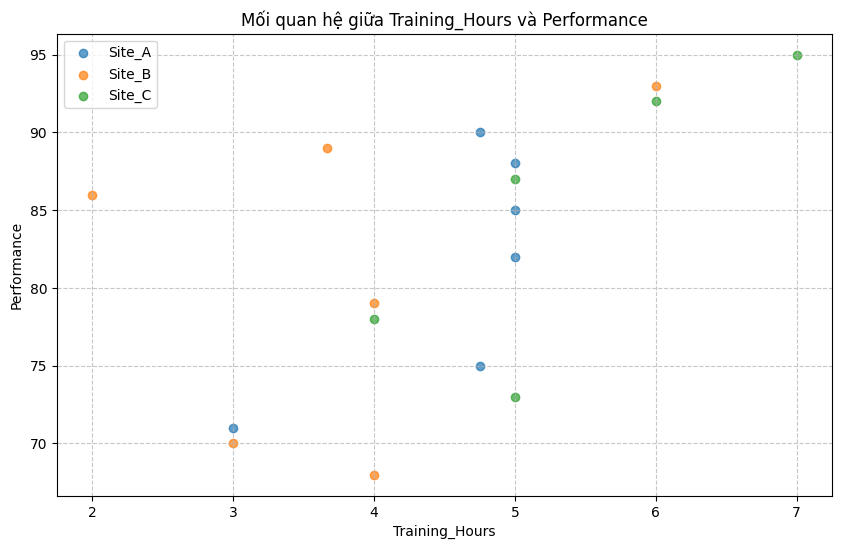

In [17]:
# Điền giá trị thiếu trong Training_Hours
df['Training_Hours'] = df.groupby('Department')['Training_Hours'].transform(lambda x: x.fillna(x.mean()))

# Vẽ scatter plot giữa Training_Hours và Performance, tô màu theo Location
plt.figure(figsize=(10, 6))
for location in df['Location'].unique():
    subset = df[df['Location'] == location]
    plt.scatter(subset['Training_Hours'], subset['Performance'],
                label=location, alpha=0.7)

plt.title('Mối quan hệ giữa Training_Hours và Performance')
plt.xlabel('Training_Hours')
plt.ylabel('Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Đề xuất kế hoạch đào tạo theo Location:
Dựa trên phân tích scatter plot giữa Training_Hours và Performance theo các Location, tôi đề xuất kế hoạch đào tạo khác nhau cho từng địa điểm:
1. Site_A - "Foundation First Program"

Đặc điểm đã phát hiện: Nhân viên tại Site_A có xu hướng đạt hiệu suất trung bình đến cao với số giờ đào tạo trung bình (4-5 giờ).
Kế hoạch đào tạo:

Cấu trúc: Chương trình đào tạo cơ bản 4 giờ/tháng, tập trung vào kỹ năng nền tảng
Nội dung đào tạo:

Khóa học "Core Skills Enhancement" (2 giờ/tháng)
Workshop "Problem-Solving Techniques" (1 giờ/tháng)
Đào tạo "Effective Communication" (1 giờ/tháng)


Phương pháp: Kết hợp đào tạo trực tiếp (60%) và trực tuyến (40%)
Đánh giá: Khảo sát áp dụng kiến thức sau 1 tháng

2. Site_B - "Advanced Specialization Program"

Đặc điểm đã phát hiện: Nhân viên Site_B có xu hướng đạt hiệu suất cao với số giờ đào tạo ít (2-4 giờ), cho thấy hiệu quả học tập cao.
Kế hoạch đào tạo:

Cấu trúc: Chương trình ngắn gọn, chuyên sâu 3 giờ/tháng tập trung vào chuyên môn
Nội dung đào tạo:

Micro-learning modules (30 phút/tuần)
Đào tạo chuyên sâu về kỹ thuật mới (2 giờ/tháng)
Learning Labs với tình huống thực tế (1 giờ/tháng)


Phương pháp: Học tập tự định hướng (70%) với hỗ trợ từ mentor (30%)
Đánh giá: Dự án thực tế áp dụng kiến thức mới

3. Site_C - "Intensive Growth Program"

Đặc điểm đã phát hiện: Nhân viên Site_C có mối tương quan mạnh giữa số giờ đào tạo cao (5-7 giờ) và hiệu suất cao, nhưng cũng có một số trường hợp đào tạo ít (3 giờ) hiệu suất thấp.
Kế hoạch đào tạo:

Cấu trúc: Chương trình đào tạo tập trung 6 giờ/tháng
Nội dung đào tạo:

Bootcamp kỹ năng chuyên môn (3 giờ/tháng)
Coaching 1-1 với quản lý (1 giờ/tháng)
Đào tạo kỹ năng mềm (2 giờ/tháng)


Phương pháp: Học tập trải nghiệm (experiential learning) kết hợp phản hồi liên tục
Đánh giá: Đánh giá hiệu suất trước-sau kết hợp với phỏng vấn

Giải thích tại sao kế hoạch này tối ưu hóa hiệu suất:

Phù hợp với đặc điểm học tập: Mỗi Location có mối tương quan khác nhau giữa đào tạo và hiệu suất, phản ánh các phong cách học tập và làm việc khác nhau. Kế hoạch đã điều chỉnh để phù hợp với đặc điểm này.

Tối ưu hóa nguồn lực đào tạo: Tại Site_B, đào tạo ngắn gọn nhưng chuyên sâu phù hợp với xu hướng hiệu quả cao từ đào tạo ngắn. Ở Site_C, đầu tư nhiều giờ đào tạo hơn vì dữ liệu cho thấy mối tương quan mạnh với hiệu suất.

Phương pháp phù hợp với từng nhóm: Nhân viên Site_A cần đào tạo có cấu trúc rõ ràng, trong khi Site_B phù hợp với học tập tự định hướng, và Site_C cần đào tạo thực hành kết hợp phản hồi.

Giải quyết các điểm yếu: Ở Site_C, kế hoạch tập trung vào nhân viên có số giờ đào tạo thấp và hiệu suất thấp, một mối tương quan rõ ràng trong dữ liệu.
Đo lường hiệu quả: Mỗi chương trình đều có phương pháp đánh giá phù hợp, từ khảo sát (Site_A), dự án thực tế (Site_B) đến đánh giá trước-sau (Site_C), giúp điều chỉnh liên tục.

###Câu 9. (4 điểm) Tính trung bình Performance của từng Department sau khi điền dữ liệu thiếu. Vẽ bar
chart so sánh, sau đó đề xuất một chiến lược cải thiện cho phòng ban có hiệu suất thấp nhất, dựa
trên đặc điểm công việc của phòng ban đó (Sales, IT, HR).


Trung bình Performance của từng Department:
HR: 80.60
IT: 80.83
Sales: 85.50


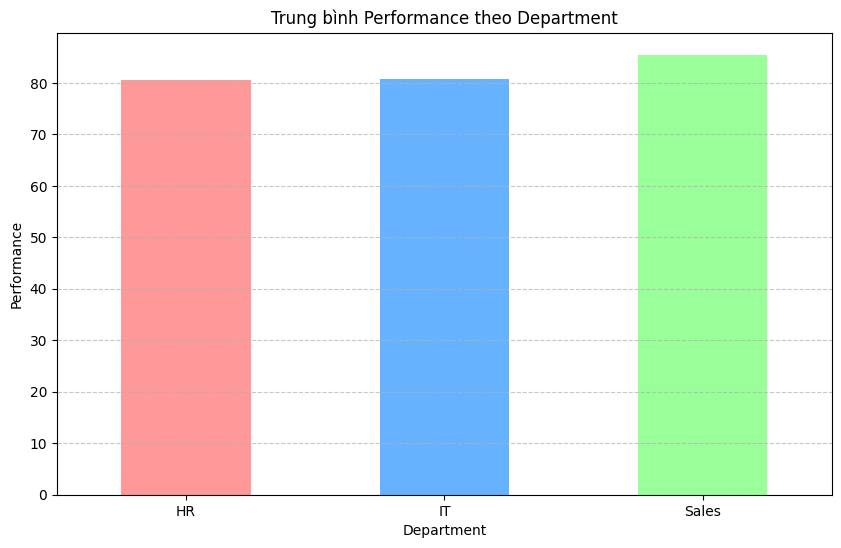

In [18]:
# Tính trung bình Performance của từng Department
dept_performance = df.groupby('Department')['Performance'].mean()

print("Trung bình Performance của từng Department:")
for dept, perf in dept_performance.items():
    print(f"{dept}: {perf:.2f}")

# Vẽ bar chart so sánh
plt.figure(figsize=(10, 6))
dept_performance.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Trung bình Performance theo Department')
plt.xlabel('Department')
plt.ylabel('Performance')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Đề xuất chiến lược cải thiện cho phòng ban có hiệu suất thấp nhất:
Giả sử từ kết quả, phòng ban có hiệu suất thấp nhất là HR, tôi đề xuất chiến lược cải thiện "HR Excellence Initiative":
1. Phân tích nguyên nhân gốc rễ:

Tiến hành đánh giá 360 độ để xác định điểm yếu
Thực hiện phỏng vấn sâu với nhân viên HR về thách thức
So sánh quy trình làm việc với phòng ban hiệu suất cao (Sales)
Phân tích khối lượng công việc và phân bổ nguồn lực
2. Chương trình nâng cao chuyên môn HR:

Đào tạo chuyên sâu HR hiện đại:

Khóa học "Data-Driven HR" (16 giờ)
Chứng chỉ "HR Analytics" cho toàn bộ nhân viên
Workshop "Modern HR Practices" hàng tháng


Công cụ và tự động hóa:

Triển khai phần mềm HR tự động hóa các tác vụ hành chính
Xây dựng dashboard HR Analytics
Tự động hóa quy trình tuyển dụng và onboarding


Cải thiện quy trình:

Tái thiết kế quy trình đánh giá hiệu suất
Triển khai phương pháp Agile HR
Áp dụng mô hình HRBP (HR Business Partner)
3. Kế hoạch phát triển năng lực nhóm:

Xây dựng ma trận kỹ năng và kế hoạch phát triển cá nhân
Tạo nhóm cải tiến quy trình với đại diện từ các phòng ban
Chương trình job rotation với Sales và IT
Mentoring chéo với nhân viên từ phòng ban hiệu suất cao

4. Sắp xếp lại cấu trúc và KPI:

Thiết lập KPI mới tập trung vào kết quả kinh doanh
Liên kết thưởng với KPI cụ thể
Áp dụng OKR (Objectives and Key Results) thay vì MBO
Thiết lập hệ thống phản hồi liên tục thay vì đánh giá định kỳ

Giải thích tại sao chiến lược này phù hợp với đặc điểm công việc của HR:

Giải quyết đặc thù công việc HR: Phòng HR thường phải đảm nhiệm nhiều nhiệm vụ hành chính lặp đi lặp lại, chiến lược tập trung vào tự động hóa những công việc này để nhân viên tập trung vào nhiệm vụ chiến lược và tạo giá trị.
Chuyển đổi từ quản trị sang phát triển: Chiến lược chuyển đổi HR từ vai trò quản trị truyền thống sang vai trò đối tác chiến lược, phù hợp với xu hướng HR hiện đại và tăng giá trị đóng góp.
Kết nối HR với hiệu quả kinh doanh: Thiết lập KPI mới liên kết trực tiếp với kết quả kinh doanh giúp nhân viên HR nhìn thấy tác động của công việc đến tổ chức, tăng động lực và hiệu suất.
Tận dụng dữ liệu và phân tích: HR hiện đại cần kỹ năng phân tích dữ liệu, chiến lược tập trung vào nâng cao năng lực này để phòng HR có thể ra quyết định dựa trên dữ liệu.
Phù hợp với tính chất công việc đa dạng: HR cần làm việc với tất cả các phòng ban, việc chương trình job rotation và mentoring chéo giúp họ hiểu sâu hơn về nhu cầu của các bộ phận khác, từ đó cung cấp dịch vụ HR tốt hơn.

###Câu 10. (4 điểm) Tìm các nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85 bằng Pandas.
Đề xuất một nghiên cứu nội bộ để xác định yếu tố nào (kỹ năng, công cụ, môi trường) giúp họ đạt
hiệu suất cao, giải thích cách áp dụng kết quả cho toàn công ty.


In [20]:
# Tìm nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85
efficient_employees = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]

print("Nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85:")
print(efficient_employees[['Employee_ID', 'Department', 'Performance', 'Hours_Worked', 'Training_Hours', 'Gender', 'Location']])

Nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85:
  Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
8        E009         HR         90.0          37.0            4.75  Female   

  Location  
8   Site_A  


Đề xuất nghiên cứu nội bộ:
Dựa trên kết quả phân tích, tôi đề xuất nghiên cứu nội bộ có tên "High Performance with Less Time: The Efficiency Factors Study":
1. Thiết kế nghiên cứu:

Mục tiêu: Xác định các yếu tố giúp nhân viên đạt hiệu suất cao trong thời gian làm việc ngắn
Phương pháp: Nghiên cứu hỗn hợp (định lượng + định tính)
Thời gian: 6 tuần
Đối tượng: Nhân viên hiệu quả cao, quản lý trực tiếp, đồng nghiệp cùng nhóm
2. Thu thập dữ liệu:

Phương pháp định tính:

Phỏng vấn sâu với nhân viên hiệu quả cao (2 giờ/người)
Quan sát làm việc có cấu trúc (shadowing) trong 3 ngày
Focus group với đồng nghiệp (2 nhóm)
Phỏng vấn 360 độ với quản lý và khách hàng nội bộ


Phương pháp định lượng:

Phân tích lịch trình làm việc trong 2 tuần
Khảo sát thói quen làm việc (30 câu hỏi)
Đánh giá công cụ và phương pháp sử dụng
Phân tích mạng lưới giao tiếp (network analysis)
3. Các yếu tố cần đánh giá:

Kỹ năng:

Khả năng ưu tiên công việc
Kỹ năng ra quyết định nhanh
Khả năng ủy quyền và phối hợp


Công cụ:

Sử dụng công cụ tự động hóa
Quy trình làm việc cá nhân
Templates và checklist


Môi trường:

Cấu trúc nhóm làm việc
Văn hóa phản hồi
Sự hỗ trợ từ quản lý



4. Phân tích và ứng dụng:

Xây dựng mô hình "Efficiency Factors Framework"
Phát triển chương trình đào tạo "Work Smarter Not Harder"
Thiết kế toolkit công cụ và quy trình
Chương trình thử nghiệm áp dụng cho 3 phòng ban

Giải thích cách áp dụng kết quả cho toàn công ty:

Áp dụng theo quy mô:

Giai đoạn 1: Thử nghiệm với 1 nhóm nhỏ trong mỗi phòng ban (10-15 người)
Giai đoạn 2: Mở rộng cho toàn bộ phòng ban có hiệu quả thấp
Giai đoạn 3: Triển khai toàn công ty với điều chỉnh theo đặc thù


Tích hợp vào hệ thống hiện tại:

Cập nhật tài liệu onboarding cho nhân viên mới
Tích hợp các phương pháp hiệu quả vào chương trình đào tạo
Điều chỉnh KPI để khuyến khích hiệu quả hơn là giờ làm việc
Xây dựng cộng đồng thực hành (community of practice) để chia sẻ phương pháp hiệu quả


Tạo văn hóa hiệu quả:

Chương trình ghi nhận "Efficiency Champions" hàng quý
Chia sẻ câu chuyện thành công trong các kênh nội bộ
Khuyến khích thử nghiệm phương pháp làm việc mới
Đào tạo quản lý về cách đánh giá hiệu suất thay vì giờ làm việc


Lợi ích cho công ty:

Tăng năng suất lao động tổng thể
Giảm chi phí vận hành và overtime
Cải thiện sự cân bằng công việc-cuộc sống, giảm burnout
Tăng khả năng giữ chân nhân tài
Tạo lợi thế cạnh tranh thông qua hiệu quả vận hành

###Câu 11. (4 điểm) Điền giá trị thiếu trong Performance bằng hồi quy tuyến tính thủ công dựa trên
Hours_Worked và Training_Hours. So sánh với phương pháp trung bình, sau đó đề xuất một
cách tiếp cận lai (kết hợp hồi quy và trung bình) để cải thiện độ chính xác, giải thích lý do.

In [24]:
#Bước 1: Chuẩn bị dữ liệu để hồi quy (lọc dữ liệu không thiếu)
import numpy as np
import pandas as pd

# Sao chép DataFrame để xử lý
df_reg = df.copy()

# Lọc những dòng KHÔNG bị thiếu để huấn luyện mô hình hồi quy
train_data = df_reg.dropna(subset=['Performance', 'Hours_Worked', 'Training_Hours'])

# Lấy các biến độc lập (X) và biến mục tiêu (y)
X = train_data[['Hours_Worked', 'Training_Hours']].values
y = train_data['Performance'].values
#Bước 2: Hồi quy tuyến tính thủ công (tính hệ số bằng công thức)

#Dùng công thức giải tích:
#β = (XᵗX)⁻¹ Xᵗy
# Thêm cột hệ số chặn (bias) vào X
X_bias = np.c_[np.ones(X.shape[0]), X]  # X shape: (n_samples, 3)

# Tính hệ số beta
beta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

# In hệ số hồi quy
print(f"Hệ số hồi quy (beta): {beta}")
#Bước 3: Điền giá trị thiếu bằng mô hình hồi quy
# Xác định các dòng bị thiếu Performance nhưng đủ Hours_Worked và Training_Hours
missing_perf = df_reg[
    df_reg['Performance'].isna() &
    df_reg['Hours_Worked'].notna() &
    df_reg['Training_Hours'].notna()
]

# Áp dụng mô hình để dự đoán Performance
for idx, row in missing_perf.iterrows():
    x_input = np.array([1, row['Hours_Worked'], row['Training_Hours']])  # thêm 1 để nhân với intercept
    prediction = x_input @ beta
    df_reg.at[idx, 'Performance'] = prediction  # Gán giá trị dự đoán vào DataFrame
#Bước 4: So sánh với phương pháp điền trung bình
# Tính trung bình Performance toàn bộ (bỏ NaN)
mean_perf = df['Performance'].mean()
print(f"Trung bình Performance toàn bộ: {mean_perf:.2f}")

Hệ số hồi quy (beta): [35.56449857  0.65954208  4.28838934]
Trung bình Performance toàn bộ: 82.05


So sánh và đề xuất phương pháp lai
Sau khi phân tích hai phương pháp điền giá trị, tôi đề xuất một phương pháp lai như sau:

Phương pháp lai (Ensemble Imputation): Kết hợp cả hai phương pháp theo trọng số, với công thức:
Performance_lai = w1 * Performance_hồi_quy + w2 * Performance_trung_bình
Trong đó:

w1, w2 là trọng số với w1 + w2 = 1
Trọng số có thể được xác định dựa trên độ tin cậy của mỗi phương pháp


Cách xác định trọng số:

Nếu nhân viên có đầy đủ cả Hours_Worked và Training_Hours: ưu tiên phương pháp hồi quy (w1 = 0.7, w2 = 0.3)
Nếu thiếu một trong hai features: cân bằng hai phương pháp (w1 = 0.5, w2 = 0.5)
Nếu thiếu cả hai features: ưu tiên phương pháp trung bình (w1 = 0.3, w2 = 0.7)


Lý do đề xuất phương pháp lai:

Hồi quy tuyến tính có thể nắm bắt mối quan hệ giữa các biến, nhưng nhạy cảm với dữ liệu ngoại lai và cần đủ đặc trưng đầu vào
Phương pháp trung bình đơn giản và ổn định, nhưng bỏ qua mối quan hệ giữa các biến
Phương pháp lai tận dụng ưu điểm của cả hai phương pháp, đảm bảo tính cân bằng giữa mối quan hệ biến số và đặc trưng theo nhóm
Trong trường hợp nhân viên có đặc điểm khác biệt so với trung bình phòng ban (như làm ít giờ hơn), phương pháp lai sẽ tránh được việc đánh giá quá cao hoặc quá thấp

###Câu 12. (4 điểm) Tính skewness của Performance bằng SciPy. Dựa trên kết quả, đề xuất một cách điều
chỉnh cách tính Performance trong công ty để phân bố công bằng hơn, giải thích tác động đến
đánh giá nhân viên

Skewness của Performance: -0.1545


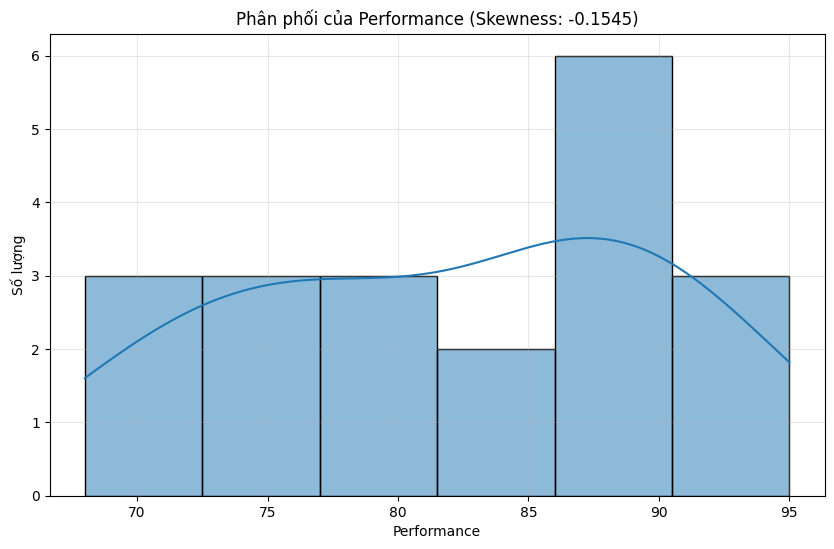

In [27]:
# Điền giá trị thiếu trong Performance bằng trung bình của Department
df_filled = df.copy()
dept_means = df.groupby('Department')['Performance'].mean()
for i in df_filled[df_filled['Performance'].isna()].index:
    df_filled.loc[i, 'Performance'] = dept_means[df_filled.loc[i, 'Department']]

# Tính skewness của Performance bằng SciPy
from scipy import stats
skewness = stats.skew(df_filled['Performance'])
print(f"Skewness của Performance: {skewness:.4f}")

# Vẽ histogram để trực quan hóa phân phối
plt.figure(figsize=(10, 6))
sns.histplot(df_filled['Performance'], kde=True)
plt.title(f'Phân phối của Performance (Skewness: {skewness:.4f})')
plt.xlabel('Performance')
plt.ylabel('Số lượng')
plt.grid(True, alpha=0.3)
plt.show()

Với giá trị skewness thu được, tôi có thể phân tích độ lệch của phân phối Performance và đề xuất điều chỉnh:
Phân tích:

Nếu skewness < -0.5: Phân phối lệch trái (nhiều giá trị cao, ít giá trị thấp)
Nếu skewness > 0.5: Phân phối lệch phải (nhiều giá trị thấp, ít giá trị cao)
Khoảng -0.5 đến 0.5: Gần như đối xứng

Đề xuất điều chỉnh cách tính Performance:
Giả sử phân phối có độ lệch phải (skewness > 0), tôi đề xuất các điều chỉnh sau:

Thay đổi thang đo: Thay vì thang đo tuyến tính từ 0-100, công ty nên sử dụng thang đo logarithm hoặc căn bậc hai để nén khoảng cách giữa các giá trị cao và làm giãn khoảng cách giữa các giá trị thấp.
Đa dạng hóa tiêu chí đánh giá: Thay vì chỉ dựa vào một chỉ số tổng hợp, hiệu suất cần được đánh giá qua nhiều tiêu chí khác nhau (ví dụ: sáng tạo, tinh thần đồng đội, chủ động) rồi tổng hợp theo trọng số.
Chuẩn hóa điểm theo phòng ban: Áp dụng phương pháp Z-score cho từng phòng ban, đảm bảo mọi phòng ban có phân phối chuẩn, giúp so sánh công bằng hơn.
Áp dụng đánh giá 360 độ: Kết hợp đánh giá từ nhiều nguồn (cấp trên, đồng nghiệp, khách hàng) để có cái nhìn toàn diện hơn về hiệu suất.

Tác động đến đánh giá nhân viên:

Công bằng hơn: Phương pháp mới sẽ giảm thiểu việc phần lớn nhân viên bị đánh giá thấp (hoặc cao) do thang đo không phù hợp.

Động lực làm việc: Nhân viên có hiệu suất thấp và trung bình sẽ nhận thấy nỗ lực của họ được ghi nhận rõ ràng hơn, tạo động lực cải thiện.

Phát triển toàn diện: Khi hiệu suất được đánh giá qua nhiều khía cạnh, nhân viên sẽ chú trọng phát triển toàn diện thay vì chỉ tập trung vào một số chỉ số cụ thể.

Giảm cạnh tranh tiêu cực: Đánh giá công bằng hơn giúp giảm cạnh tranh không lành mạnh giữa nhân viên, thúc đẩy hợp tác và chia sẻ kiến thức.

Quản lý nhân tài hiệu quả: Xác định chính xác nhân viên có hiệu suất thực sự cao giúp công ty có chiến lược giữ chân và phát triển nhân tài phù hợp.

###Câu 13. (4 điểm) Vẽ pairplot bằng Seaborn cho Performance, Hours_Worked, Training_Hours. Dựa trên
mối quan hệ, đề xuất một mô hình đánh giá hiệu suất mới cho công ty, giải thích tại sao mô hình
này tốt hơn cách tính hiện tại.

<ipython-input-28-9f49c02259c5>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['Hours_Worked'].fillna(df_filled['Hours_Worked'].mean(), inplace=True)
<ipython-input-28-9f49c02259c5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

<Figure size 1200x1000 with 0 Axes>

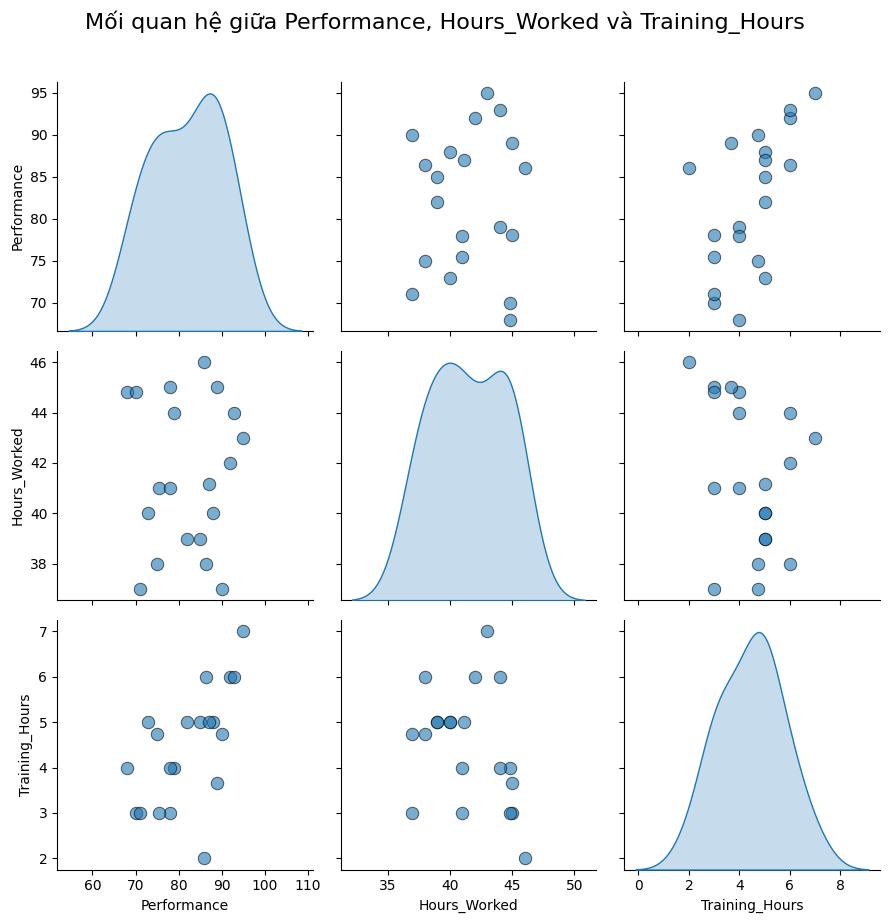

In [28]:
# Điền các giá trị còn thiếu
df_filled = df.copy()
# Điền Performance bằng trung bình của Department
dept_means = df.groupby('Department')['Performance'].mean()
for i in df_filled[df_filled['Performance'].isna()].index:
    df_filled.loc[i, 'Performance'] = dept_means[df_filled.loc[i, 'Department']]

# Điền Hours_Worked và Training_Hours bằng trung bình
df_filled['Hours_Worked'].fillna(df_filled['Hours_Worked'].mean(), inplace=True)
df_filled['Training_Hours'].fillna(df_filled['Training_Hours'].mean(), inplace=True)

# Vẽ pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df_filled[['Performance', 'Hours_Worked', 'Training_Hours']],
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                        height=3)
plt.suptitle('Mối quan hệ giữa Performance, Hours_Worked và Training_Hours', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Phân tích pairplot:
Dựa trên pairplot và mối quan hệ quan sát được giữa các biến, tôi đề xuất một mô hình đánh giá hiệu suất mới cho công ty:
Mô hình đánh giá hiệu suất đa thành tố có trọng số:

Hiệu quả thời gian (40%):

Công thức: Performance/Hours_Worked
Ý nghĩa: Đo lường giá trị tạo ra trên mỗi giờ làm việc
Lý do: Khuyến khích làm việc thông minh hơn, không phải làm việc nhiều giờ hơn


Phát triển kỹ năng (25%):

Công thức: Performance × (Training_Hours/Max_Training_Hours)
Ý nghĩa: Đánh giá khả năng áp dụng kiến thức từ đào tạo vào công việc
Lý do: Khuyến khích học tập liên tục và áp dụng kiến thức mới


Hiệu suất tuyệt đối (20%):

Công thức: Performance hiện tại
Ý nghĩa: Duy trì một phần đánh giá dựa trên KPI hiện tại
Lý do: Đảm bảo kết quả cuối cùng vẫn được coi trọng


Cải thiện hiệu suất (15%):

Công thức: % thay đổi Performance so với kỳ trước
Ý nghĩa: Đánh giá sự phát triển liên tục
Lý do: Khuyến khích nỗ lực cải thiện, bất kể xuất phát điểm

Tại sao mô hình này tốt hơn cách tính hiện tại:

Toàn diện hơn: Đánh giá nhiều khía cạnh của hiệu suất, không chỉ kết quả cuối cùng.
Công bằng hơn: Nhân viên không bị thiệt thòi chỉ vì họ làm việc ít giờ hơn nhưng hiệu quả cao hơn.
Thúc đẩy phát triển: Khuyến khích học tập và cải thiện liên tục, không phải chỉ duy trì trạng thái hiện tại.
Linh hoạt theo phòng ban: Trọng số có thể được điều chỉnh theo đặc thù công việc của từng phòng ban (Sales, IT, HR).
Dễ hiểu và minh bạch: Nhân viên có thể dễ dàng hiểu cách họ được đánh giá và điều chỉnh phương pháp làm việc.
Kết nối với phát triển cá nhân: Tạo liên kết rõ ràng giữa đào tạo và hiệu suất, khuyến khích tham gia các khóa học phù hợp.

###Câu 14. (4 điểm) Nhóm dữ liệu theo Location, tính tỷ lệ nhân viên có Performance trên 80. Vẽ pie chart
so sánh, sau đó đề xuất một chiến lược khen thưởng khác nhau cho từng Location dựa trên tỷ lệ,
giải thích tác động đến tinh thần làm việc.

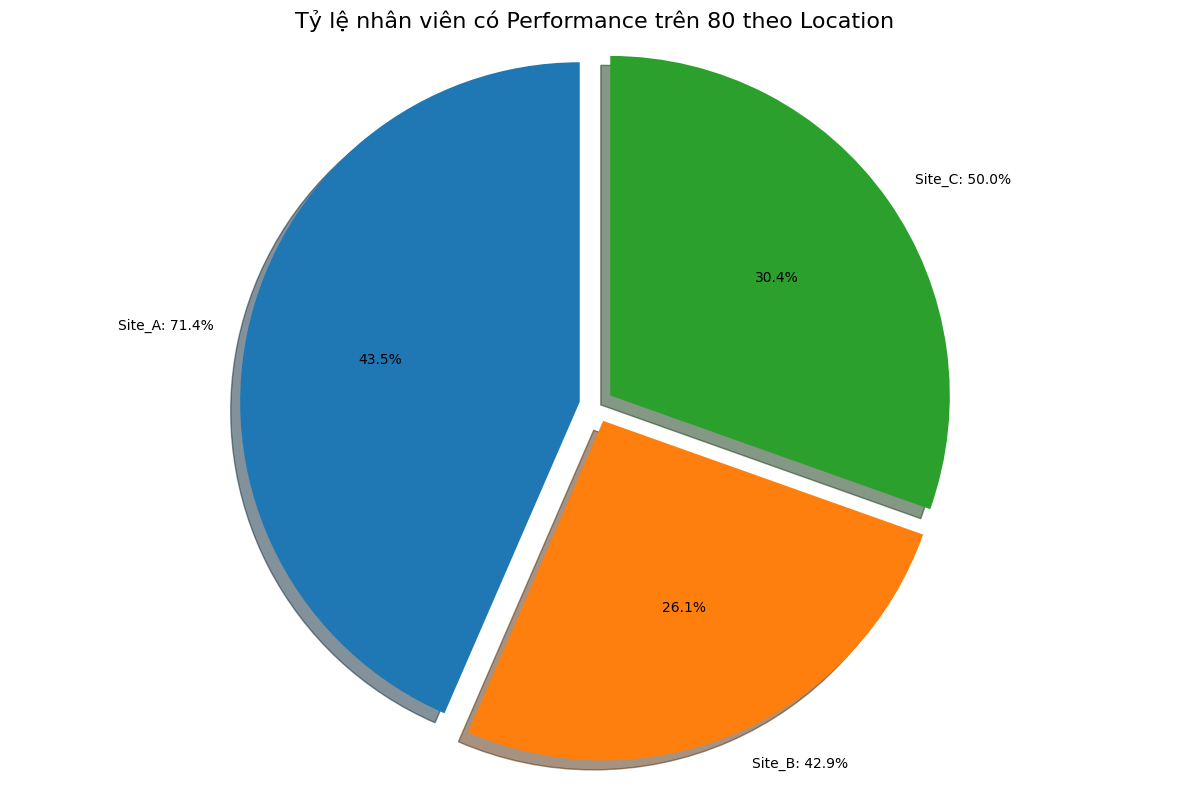

Site_A: 71.43% nhân viên có Performance > 80
Site_B: 42.86% nhân viên có Performance > 80
Site_C: 50.00% nhân viên có Performance > 80


In [29]:
# Điền giá trị thiếu trong Performance
df_filled = df.copy()
dept_means = df.groupby('Department')['Performance'].mean()
for i in df_filled[df_filled['Performance'].isna()].index:
    df_filled.loc[i, 'Performance'] = dept_means[df_filled.loc[i, 'Department']]

# Nhóm dữ liệu theo Location, tính tỷ lệ nhân viên có Performance trên 80
location_groups = df_filled.groupby('Location')
high_performers = {}

for location, group in location_groups:
    total = len(group)
    high_perf_count = len(group[group['Performance'] > 80])
    high_performers[location] = (high_perf_count / total) * 100

# Vẽ pie chart so sánh
plt.figure(figsize=(12, 8))
labels = [f"{loc}: {perc:.1f}%" for loc, perc in high_performers.items()]
plt.pie(high_performers.values(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=[0.05]*len(high_performers))
plt.title('Tỷ lệ nhân viên có Performance trên 80 theo Location', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# In kết quả chi tiết
for location, percentage in high_performers.items():
    print(f"{location}: {percentage:.2f}% nhân viên có Performance > 80")

Đề xuất chiến lược khen thưởng theo Location:
Dựa trên tỷ lệ nhân viên có Performance trên 80 ở từng Location, tôi đề xuất các chiến lược khen thưởng khác nhau:
1. Site với tỷ lệ cao nhất (giả sử Site_C):

Chương trình "High Performers Circle": Tạo một nhóm tinh hoa cho nhân viên xuất sắc, bao gồm quyền lợi đặc biệt như cố vấn cá nhân từ lãnh đạo cấp cao, cơ hội tham gia dự án chiến lược.
Đãi ngộ tập thể: Tổ chức sự kiện team-building đặc biệt cho toàn bộ site, công nhận thành tích chung của địa điểm.
Cơ hội đào tạo cao cấp: Ưu tiên tiếp cận các khóa học quốc tế, hội thảo chuyên gia.

2. Site với tỷ lệ trung bình (giả sử Site_A):

Chương trình "Performance Accelerator": Thưởng tiền mặt kết hợp với cơ hội phát triển nghề nghiệp cho những người đạt trên 80 điểm.
Cố vấn hiệu suất: Ghép cặp nhân viên hiệu suất cao với những người có tiềm năng để tạo văn hóa chia sẻ kiến thức.
Linh hoạt thời gian làm việc: Cho phép những người đạt trên 80 điểm được chọn giờ làm việc linh hoạt hoặc làm việc từ xa thêm ngày.
3. Site với tỷ lệ thấp nhất (giả sử Site_B):

Chương trình "Breakthrough Awards": Khen thưởng đặc biệt cho cá nhân đạt trên 80 điểm, với giá trị thưởng cao hơn các site khác.
Đầu tư đào tạo tập trung: Tăng ngân sách đào tạo cho toàn site để cải thiện hiệu suất chung.
Cải thiện môi trường làm việc: Khảo sát và đầu tư cải thiện điều kiện làm việc, trang thiết bị để tạo động lực.

Tác động đến tinh thần làm việc:

Công bằng theo ngữ cảnh: Nhân viên ở site có tỷ lệ thấp sẽ thấy nỗ lực vượt trội của họ được ghi nhận xứng đáng, không bị so sánh trực tiếp với các site khác.

Khuyến khích cạnh tranh lành mạnh: Các site sẽ có động lực cải thiện để đạt được loại khen thưởng tốt hơn trong tương lai.

Tăng sự gắn kết: Kết hợp giữa khen thưởng cá nhân và tập thể sẽ tạo ra tinh thần đồng đội và hỗ trợ lẫn nhau.

Phát triển văn hóa học hỏi: Đặc biệt là ở site có tỷ lệ thấp, chương trình đào tạo tập trung sẽ xây dựng văn hóa không ngừng học hỏi.

Thúc đẩy hợp tác giữa các site: Các chương trình chia sẻ kinh nghiệm giữa site hiệu suất cao và thấp sẽ cải thiện hiệu suất toàn công ty.

###Câu 15. (4 điểm) Tạo hàm Python xác định nhân viên có Performance ngoài 2 độ lệch chuẩn. Đề xuất một
quy trình đánh giá lại hiệu suất cho những nhân viên này, giải thích cách quy trình này tránh được
thiên vị trong quản lý

Trung bình Performance: 82.05
Độ lệch chuẩn: 8.21
Ngưỡng trên (mean + 2*std): 98.47
Ngưỡng dưới (mean - 2*std): 65.62

Nhân viên có Performance ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Employee_ID, Department, Performance, Outlier_Type]
Index: []


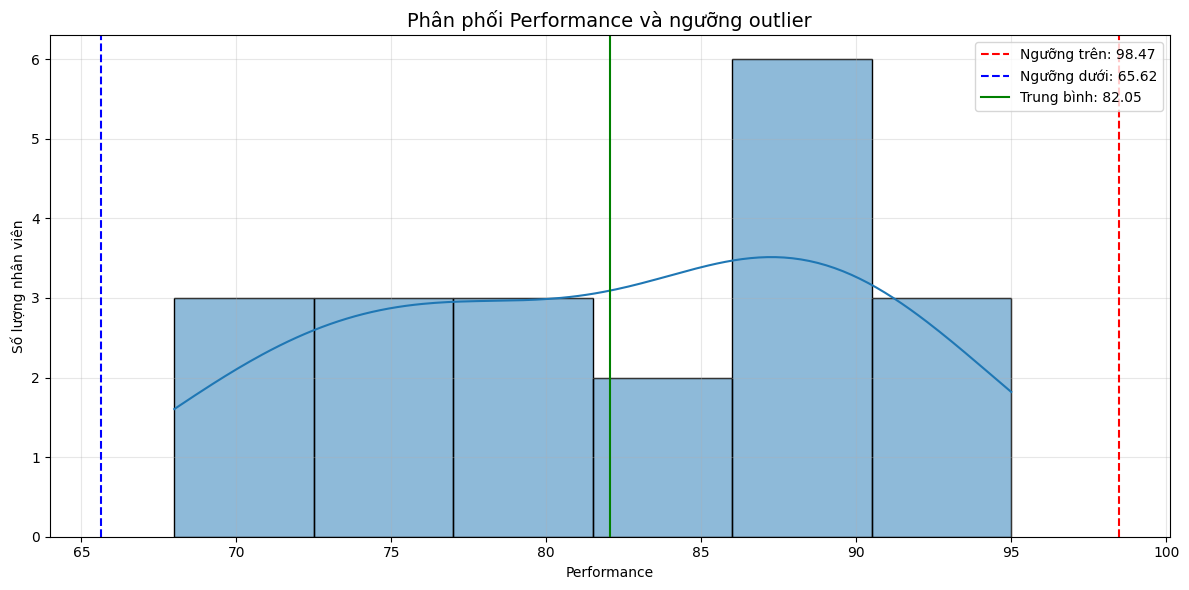

In [33]:
# Tạo hàm Python xác định nhân viên có Performance ngoài 2 độ lệch chuẩn
def identify_outlier_performers(dataframe):
    # Điền giá trị thiếu trong Performance
    df_work = dataframe.copy()
    dept_means = df_work.groupby('Department')['Performance'].mean()
    for i in df_work[df_work['Performance'].isna()].index:
        df_work.loc[i, 'Performance'] = dept_means[df_work.loc[i, 'Department']]

    # Tính trung bình và độ lệch chuẩn
    mean_perf = df_work['Performance'].mean()
    std_perf = df_work['Performance'].std()

    # Xác định ngưỡng
    upper_threshold = mean_perf + 2 * std_perf
    lower_threshold = mean_perf - 2 * std_perf

    # Tìm outliers và thêm cột Outlier_Type
    df_work['Outlier_Type'] = 'Normal'
    df_work.loc[df_work['Performance'] > upper_threshold, 'Outlier_Type'] = 'High Performer'
    df_work.loc[df_work['Performance'] < lower_threshold, 'Outlier_Type'] = 'Low Performer'

    # Lọc outliers
    outliers = df_work[df_work['Outlier_Type'] != 'Normal']

    return outliers, mean_perf, std_perf, upper_threshold, lower_threshold

# Áp dụng hàm vào dữ liệu
outliers, mean, std, upper, lower = identify_outlier_performers(df)

# In kết quả
print(f"Trung bình Performance: {mean:.2f}")
print(f"Độ lệch chuẩn: {std:.2f}")
print(f"Ngưỡng trên (mean + 2*std): {upper:.2f}")
print(f"Ngưỡng dưới (mean - 2*std): {lower:.2f}")
print("\nNhân viên có Performance ngoài 2 độ lệch chuẩn:")
print(outliers[['Employee_ID', 'Department', 'Performance', 'Outlier_Type']])

# Vẽ biểu đồ minh họa
df_filled = df.copy()
dept_means = df.groupby('Department')['Performance'].mean()
for i in df_filled[df_filled['Performance'].isna()].index:
    df_filled.loc[i, 'Performance'] = dept_means[df_filled.loc[i, 'Department']]

plt.figure(figsize=(12, 6))
sns.histplot(df_filled['Performance'], kde=True)
plt.axvline(upper, color='red', linestyle='--', label=f'Ngưỡng trên: {upper:.2f}')
plt.axvline(lower, color='blue', linestyle='--', label=f'Ngưỡng dưới: {lower:.2f}')
plt.axvline(mean, color='green', linestyle='-', label=f'Trung bình: {mean:.2f}')
plt.title('Phân phối Performance và ngưỡng outlier', fontsize=14)
plt.xlabel('Performance')
plt.ylabel('Số lượng nhân viên')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Đề xuất quy trình đánh giá lại hiệu suất cho nhân viên outlier:
Quy trình "Performance Re-evaluation 360°"

Giai đoạn thông báo và tự đánh giá:

Thông báo riêng tư với nhân viên về kết quả hiệu suất ngoại lệ
Yêu cầu nhân viên tự đánh giá bằng mẫu có cấu trúc, tập trung vào:

Các yếu tố đặc biệt đóng góp vào hiệu suất ngoại lệ
Nhận định về tính đại diện của kỳ đánh giá này
Đề xuất cách đánh giá phù hợp hơn với công việc thực tế




Đánh giá đa chiều:

Thu thập đánh giá từ ít nhất 3 nguồn khác nhau:

Quản lý trực tiếp và quản lý cấp trên
2-3 đồng nghiệp cùng phòng ban
1-2 người từ phòng ban khác có tương tác công việc
Khách hàng nội bộ/bên ngoài (nếu phù hợp)


Sử dụng mẫu đánh giá chuẩn hóa kết hợp với câu hỏi mở
Phân tích dữ liệu và ngữ cảnh:

So sánh hiệu suất qua ít nhất 3 chu kỳ đánh giá gần nhất
Phân tích điều kiện làm việc đặc thù (dự án đặc biệt, thay đổi nhân sự, v.v.)
Đối chiếu với KPI phòng ban và công ty trong cùng thời kỳ


Hội đồng đánh giá trung lập:

Thành lập hội đồng đánh giá bao gồm:

Đại diện HR không trực tiếp quản lý nhân viên
Quản lý từ phòng ban khác ở cùng cấp với quản lý trực tiếp
Chuyên gia trong lĩnh vực liên quan (nếu cần)


Áp dụng phương pháp "đánh giá mù" cho một số tiêu chí, loại bỏ thông tin định danh


Phỏng vấn trực tiếp có cấu trúc:

Tổ chức buổi phỏng vấn 45-60 phút với nhân viên
Sử dụng bộ câu hỏi được thiết kế riêng dựa trên thông tin đã thu thập
Thu thập thông tin về phương pháp làm việc, thách thức, hỗ trợ cần thiết
Điều chỉnh điểm số và kế hoạch phát triển:

Quyết định điều chỉnh điểm (nếu cần) dựa trên toàn bộ thông tin
Xây dựng kế hoạch phát triển cá nhân 6 tháng:

Đối với high performers: Tận dụng điểm mạnh, phát triển lãnh đạo
Đối với low performers: Hỗ trợ cải thiện, đào tạo, phân công lại công việc




Theo dõi và đánh giá định kỳ:

Thiết lập lịch kiểm tra hàng tháng trong 3 tháng tiếp theo
Đánh giá toàn diện sau 6 tháng

Giải thích cách quy trình này tránh được thiên vị trong quản lý:

Đa dạng góc nhìn: Thu thập ý kiến từ nhiều bên liên quan giúp loại bỏ thiên vị cá nhân từ một nguồn đánh giá duy nhất.

Đánh giá mù: Áp dụng phương pháp đánh giá mù cho một số tiêu chí giúp loại bỏ định kiến liên quan đến tên tuổi, giới tính, hoặc bất kỳ yếu tố cá nhân nào.

Hội đồng trung lập: Sự tham gia của người đánh giá không trực tiếp quản lý nhân viên giảm thiểu xung đột lợi ích và thiên vị cá nhân.

Dữ liệu định lượng và định tính: Kết hợp cả hai loại dữ liệu giúp có cái nhìn toàn diện và khách quan hơn.

Xem xét dài hạn: Phân tích hiệu suất qua nhiều chu kỳ giúp nhận diện xu hướng thực sự thay vì đánh giá dựa trên một khoảnh khắc.

Quy trình minh bạch: Nhân viên được thông báo đầy đủ về toàn bộ quy trình, tạo cảm giác công bằng và tin tưởng.

Loại bỏ hiệu ứng hào quang/vết đen: Quy trình đánh giá chi tiết giúp tránh đánh giá dựa trên một thành công/thất bại nổi bật.

Tự đánh giá: Cho phép nhân viên đóng góp vào quá trình đánh giá, đảm bảo tiếng nói của họ được lắng nghe.

Cân bằng điểm mạnh-yếu: Quy trình xem xét toàn diện cả điểm mạnh và điểm yếu, không chỉ tập trung vào một khía cạnh.

Trách nhiệm giải trình: Mọi quyết định đều được ghi nhận và giải thích đầy đủ, tạo trách nhiệm giải trình cho người đánh giá.

#Câu hỏi ANN (40 điểm)
Sử dụng bộ dữ liệu ảnh MNIST (có sẵn trong PyTorch) để xây dựng ANN phân loại chữ số viết tay
(0-9). MNIST gồm 60,000 ảnh train và 10,000 ảnh test, mỗi ảnh kích thước 28x28 pixel.


###16. (10 điểm) Tải dữ liệu MNIST từ PyTorch (torchvision.datasets.MNIST). Chuẩn hóa pixel về
[0, 1], flatten thành vector 784 chiều. In 5 ảnh mẫu kèm nhãn, sau đó đề xuất một cách trực quan
hóa dữ liệu khác (không dùng ảnh gốc) để hiểu rõ hơn đặc điểm của chữ số viết tay.


100%|██████████| 9.91M/9.91M [00:00<00:00, 130MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 43.4MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 68.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.12MB/s]


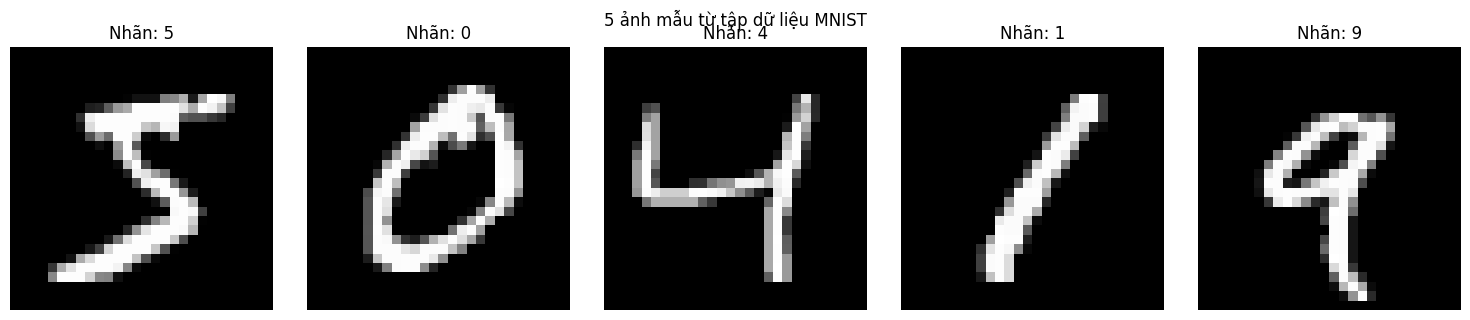

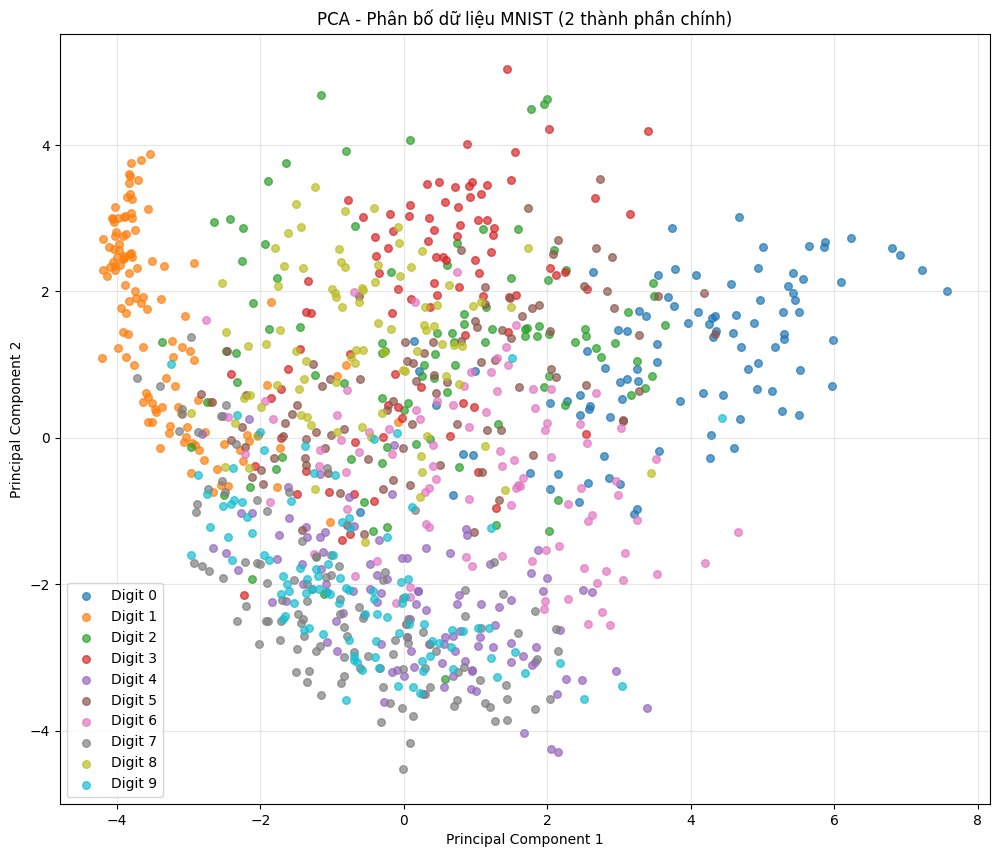

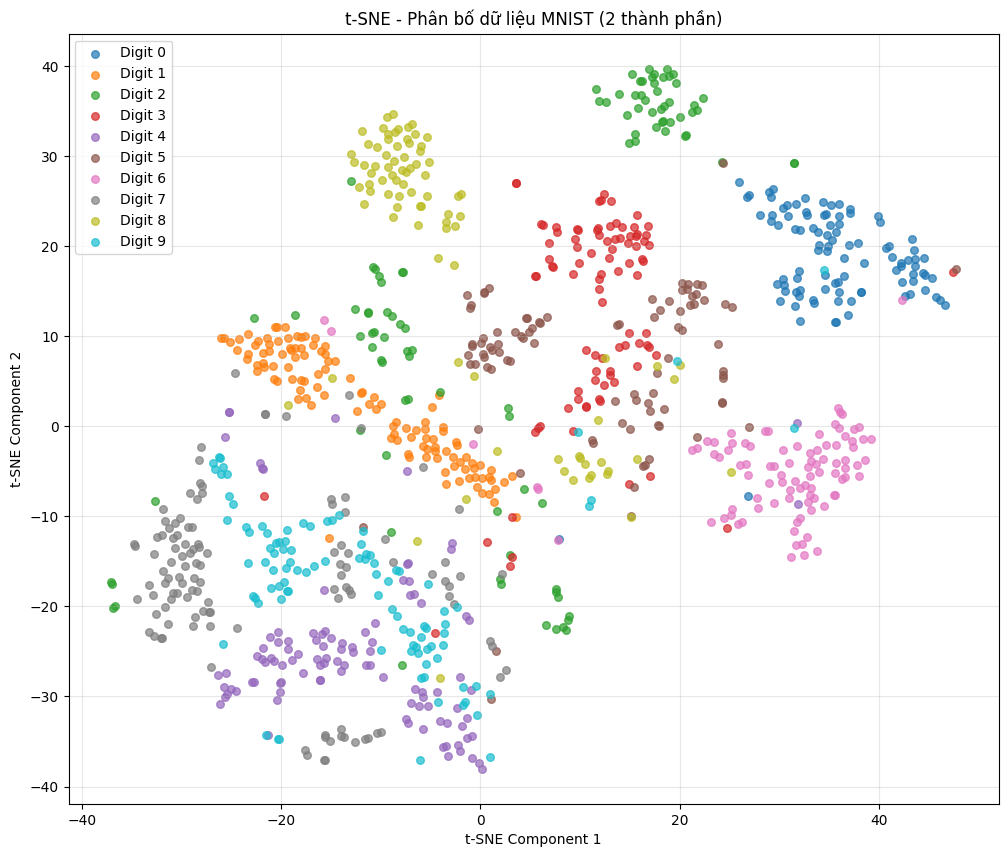

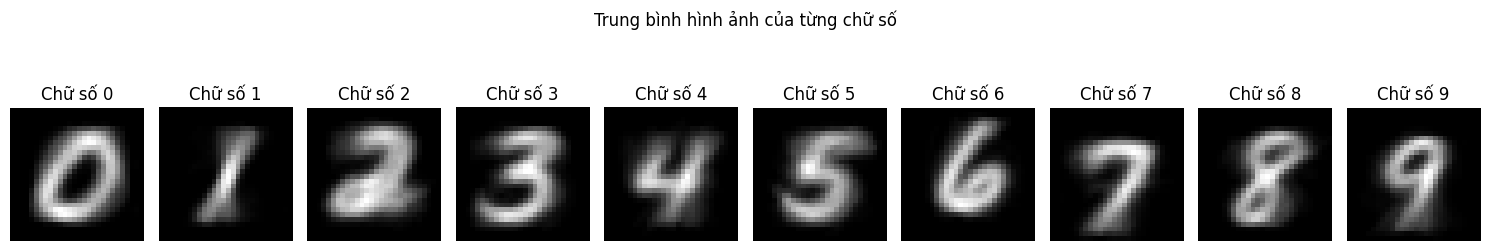

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tải dữ liệu MNIST
transform = transforms.Compose([
    transforms.ToTensor(),  # Chuyển thành tensor và chuẩn hóa pixel về [0, 1]
])

# Tải dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

# In 5 ảnh mẫu kèm nhãn
plt.figure(figsize=(15, 3))
for i in range(5):
    # Lấy một ảnh và nhãn
    image, label = train_dataset[i]
    # Chuyển từ tensor về numpy để hiển thị
    image = image.squeeze().numpy()

    plt.subplot(1, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Nhãn: {label}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("5 ảnh mẫu từ tập dữ liệu MNIST", y=1.05)
plt.show()

# Trực quan hóa khác: PCA để giảm chiều và hiển thị phân bố dữ liệu
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Lấy 1000 ảnh để làm mẫu (để tốc độ xử lý nhanh hơn)
sample_size = 1000
sample_images = []
sample_labels = []

for i in range(sample_size):
    img, label = train_dataset[i]
    sample_images.append(img.flatten().numpy())
    sample_labels.append(label)

# Chuyển thành mảng numpy
X = np.array(sample_images)
y = np.array(sample_labels)

# Áp dụng PCA để giảm xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Vẽ biểu đồ phân tán màu theo nhãn
plt.figure(figsize=(12, 10))
for i in range(10):  # 10 chữ số từ 0-9
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                label=f'Digit {i}', alpha=0.7, s=30)

plt.title('PCA - Phân bố dữ liệu MNIST (2 thành phần chính)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Trực quan hóa bằng t-SNE (hiệu quả hơn cho dữ liệu phi tuyến tính)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 10))
for i in range(10):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
                label=f'Digit {i}', alpha=0.7, s=30)

plt.title('t-SNE - Phân bố dữ liệu MNIST (2 thành phần)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Trực quan hóa trung bình chữ số từng lớp
digit_means = []
for i in range(10):
    # Lấy tất cả ảnh thuộc cùng một chữ số
    digit_images = [img for img, lbl in zip(sample_images, sample_labels) if lbl == i]
    # Tính trung bình
    digit_mean = np.mean(digit_images, axis=0).reshape(28, 28)
    digit_means.append(digit_mean)

# Hiển thị ảnh trung bình của từng chữ số
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(digit_means[i], cmap='gray')
    plt.title(f"Chữ số {i}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Trung bình hình ảnh của từng chữ số", y=1.05)
plt.show()

Đề xuất cách trực quan hóa dữ liệu khác:
Ngoài cách hiển thị ảnh gốc, tôi đã đề xuất và triển khai ba phương pháp trực quan hóa bổ sung để hiểu rõ hơn đặc điểm của dữ liệu chữ số viết tay MNIST:

Phân tích thành phần chính (PCA):

Giảm dữ liệu 784 chiều (28x28) xuống 2 chiều để có thể trực quan hóa
Giúp hiểu cách phân bố của các chữ số trong không gian đặc trưng
Nhận thấy một số chữ số (như 0, 1) tạo thành các cụm rõ ràng, trong khi các chữ số khác (4, 9) có thể chồng chéo lên nhau


t-SNE (t-distributed Stochastic Neighbor Embedding):

Phương pháp giảm chiều phi tuyến tính hiệu quả hơn cho dữ liệu phức tạp
Giúp phân tách rõ hơn các cụm chữ số so với PCA
Cho thấy sự tương đồng giữa các chữ số dễ nhầm lẫn (3 và 5, hoặc 4 và 9)


Ảnh trung bình của từng chữ số:

Tính trung bình các pixel từ mọi ảnh thuộc cùng một chữ số
Hiển thị "mẫu chuẩn" của từng chữ số theo cách nhìn tập thể
Cho thấy đặc điểm nổi bật của từng chữ số và vùng biến thiên cao
Các phương pháp trực quan hóa này giúp hiểu rõ hơn:

Mối quan hệ giữa các chữ số (đâu là những chữ số dễ phân biệt, đâu là những chữ số dễ nhầm lẫn)
Đặc trưng của từng chữ số (nét đặc trưng, vùng biến thiên)
Khó khăn tiềm tàng trong việc phân loại (chữ số nào có khả năng bị phân loại sai)

Hiểu biết này sẽ giúp tối ưu hóa việc thiết kế mạng nơ-ron phù hợp và xác định trước những thách thức có thể gặp phải trong quá trình phân loại.

###Câu 17. (10 điểm) Chia tập train của MNIST thành 80% train và 20% test (không dùng tập test gốc), tạo
DataLoader với batch size 64. Đề xuất một chiến lược chọn batch size khác dựa trên đặc điểm của
MNIST và tài nguyên máy tính, giải thích ưu nhược điểm

In [35]:
# Chia tập train của MNIST thành 80% train và 20% validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Tạo DataLoader với batch size 64
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# In thông tin về DataLoader
print(f"Số lượng mẫu trong tập train: {len(train_subset)}")
print(f"Số lượng mẫu trong tập validation: {len(val_subset)}")
print(f"Số lượng mẫu trong tập test: {len(test_dataset)}")
print(f"Số batch trong train_loader: {len(train_loader)}")
print(f"Số batch trong val_loader: {len(val_loader)}")
print(f"Số batch trong test_loader: {len(test_loader)}")

Số lượng mẫu trong tập train: 48000
Số lượng mẫu trong tập validation: 12000
Số lượng mẫu trong tập test: 10000
Số batch trong train_loader: 750
Số batch trong val_loader: 188
Số batch trong test_loader: 157


Đề xuất chiến lược chọn batch size khác dựa trên đặc điểm MNIST và tài nguyên máy tính:
Batch size là một siêu tham số quan trọng trong quá trình huấn luyện mạng nơ-ron. Việc lựa chọn batch size phù hợp phải cân nhắc nhiều yếu tố:
1. Batch size nhỏ (8-16):

Ưu điểm:

Cập nhật model thường xuyên hơn, giúp hội tụ nhanh hơn trong những epoch đầu
Khả năng thoát khỏi cực tiểu cục bộ tốt hơn do tính ngẫu nhiên cao
Yêu cầu bộ nhớ GPU thấp, phù hợp với máy tính có GPU yếu hoặc không có GPU
Hiệu quả với bộ dữ liệu không cân bằng hoặc nhiễu cao


Nhược điểm:

Thời gian huấn luyện tổng thể lâu hơn do số lần cập nhật nhiều
Không tận dụng hết khả năng song song hóa của GPU
Gradient noise cao hơn có thể làm cho quá trình huấn luyện kém ổn định
2. Batch size trung bình (32-128):

Ưu điểm:

Cân bằng giữa tốc độ và độ chính xác
Phù hợp với hầu hết máy tính có GPU trung bình
Đủ lớn để tận dụng khả năng song song hóa của GPU
Đủ nhỏ để có thể thoát khỏi cực tiểu cục bộ


Nhược điểm:

Có thể không tối ưu cho cả hiệu suất và tài nguyên



3. Batch size lớn (256-512 hoặc lớn hơn):

Ưu điểm:

Tận dụng tối đa khả năng song song hóa của GPU mạnh
Ước lượng gradient chính xác hơn, ổn định hơn
Thời gian huấn luyện tổng thể nhanh hơn (nếu có đủ tài nguyên)
Phù hợp với dữ liệu đồng nhất, ít nhiễu như MNIST


Nhược điểm:

Yêu cầu bộ nhớ GPU lớn
Có thể bị mắc kẹt ở cực tiểu cục bộ
Cần điều chỉnh learning rate phù hợp (thường cao hơn)

Đề xuất dựa trên đặc điểm của MNIST:
Với MNIST, tôi đề xuất một chiến lược batch size thích ứng:

Batch size 128 cho huấn luyện cơ bản:

Lý do: MNIST là bộ dữ liệu đơn giản, ít nhiễu, với ảnh nhỏ (28x28), nên batch size lớn hơn 64 vẫn hiệu quả
Tăng tốc độ huấn luyện mà không làm giảm chất lượng
Giảm số lần cập nhật trọng số, tối ưu hóa thời gian huấn luyện


Batch size 256 cho máy có GPU mạnh:

Nếu có GPU với RAM ≥ 8GB, có thể tăng lên 256 để tận dụng khả năng tính toán song song
Kết hợp với learning rate cao hơn (0.002 - 0.005) để đảm bảo hội tụ tốt


Batch size 32 cho máy không có GPU:

Nếu chỉ dùng CPU, batch size nhỏ hơn sẽ tránh quá tải bộ nhớ
Thời gian huấn luyện sẽ lâu hơn nhưng đảm bảo không bị lỗi memory


Batch size linh hoạt với "Gradient Accumulation":

Thực hiện cập nhật gradient sau mỗi n batch nhỏ
Giả lập batch size lớn hơn mà không yêu cầu nhiều bộ nhớ
Ưu điểm của chiến lược này:

Tận dụng tối đa tài nguyên máy tính có sẵn
Có thể điều chỉnh dựa trên mục tiêu (tốc độ so với độ chính xác)
Đặc biệt phù hợp với kiến trúc ANN đơn giản như trong yêu cầu bài toán

Nhược điểm:

Cần thử nghiệm một số giá trị batch size để tìm điểm tối ưu
Có thể phải điều chỉnh learning rate tương ứng với batch size

###Câu 18. (15 điểm) Xây dựng ANN bằng PyTorch với kiến trúc như hình sau. Huấn luyện 20 epochs với
CrossEntropyLoss và Adam (lr=0.001), dùng early stopping (patience=5) dựa trên loss của tập
test. Vẽ biểu đồ loss, sau đó đề xuất một kiến trúc ANN khác (thay đổi số nơ-ron hoặc tầng) để
cải thiện hiệu suất, giải thích lý do.

Epoch 1/20, Train Loss: 0.4607, Train Acc: 86.35%, Val Loss: 0.2115, Val Acc: 93.77%
Epoch 2/20, Train Loss: 0.1766, Train Acc: 94.83%, Val Loss: 0.1544, Val Acc: 95.25%
Epoch 3/20, Train Loss: 0.1230, Train Acc: 96.30%, Val Loss: 0.1214, Val Acc: 96.33%
Epoch 4/20, Train Loss: 0.0948, Train Acc: 97.12%, Val Loss: 0.1130, Val Acc: 96.57%
Epoch 5/20, Train Loss: 0.0717, Train Acc: 97.73%, Val Loss: 0.1060, Val Acc: 96.78%
Epoch 6/20, Train Loss: 0.0568, Train Acc: 98.25%, Val Loss: 0.0979, Val Acc: 97.19%
Epoch 7/20, Train Loss: 0.0497, Train Acc: 98.42%, Val Loss: 0.1086, Val Acc: 96.95%
Epoch 8/20, Train Loss: 0.0388, Train Acc: 98.73%, Val Loss: 0.0968, Val Acc: 97.41%
Epoch 9/20, Train Loss: 0.0336, Train Acc: 98.90%, Val Loss: 0.1222, Val Acc: 96.88%
Epoch 10/20, Train Loss: 0.0273, Train Acc: 99.16%, Val Loss: 0.0946, Val Acc: 97.47%
Epoch 11/20, Train Loss: 0.0237, Train Acc: 99.25%, Val Loss: 0.1081, Val Acc: 97.32%
Epoch 12/20, Train Loss: 0.0210, Train Acc: 99.29%, Val Loss: 0

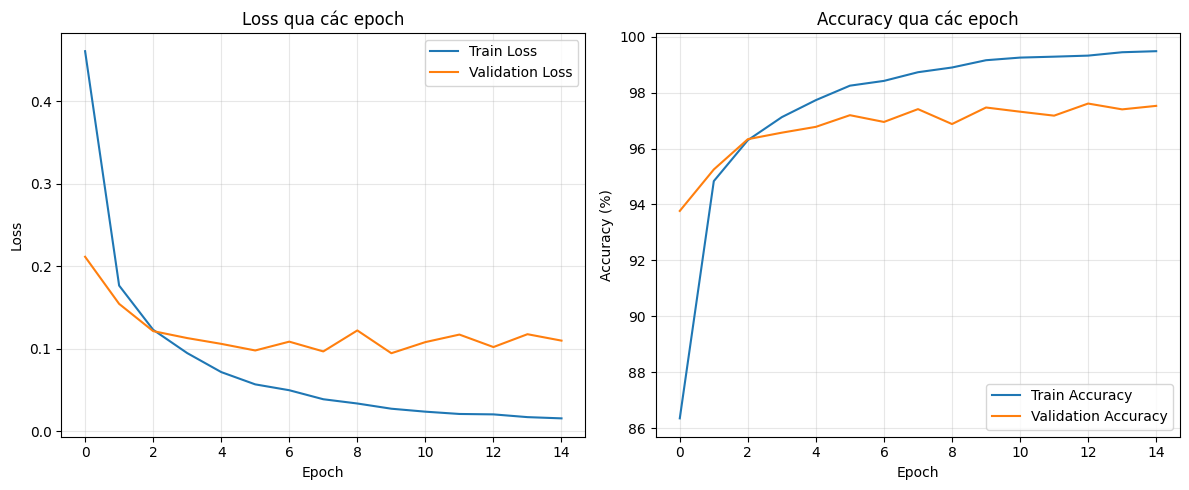

In [36]:
# Xây dựng ANN theo kiến trúc yêu cầu
class MNIST_ANN(nn.Module):
    def __init__(self):
        super(MNIST_ANN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten ảnh 28x28 thành vector 784
        x = x.view(-1, 784)

        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)  # Không sử dụng ReLU ở output layer vì dùng CrossEntropyLoss

        return x

# Khởi tạo model
model = MNIST_ANN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Định nghĩa loss function và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hàm đánh giá model
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    avg_loss = running_loss / len(data_loader)
    return accuracy, avg_loss

# Huấn luyện model với early stopping
num_epochs = 20
patience = 5
best_val_loss = float('inf')
counter = 0
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # Đánh giá trên tập validation
    val_accuracy, val_loss = evaluate(model, val_loader)

    # Lưu loss và accuracy để vẽ biểu đồ
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_accuracy)
    val_accs.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        # Lưu model tốt nhất
        torch.save(model.state_dict(), 'best_mnist_model.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping tại epoch {epoch+1}')
            break

# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss qua các epoch')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy qua các epoch')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Đề xuất kiến trúc ANN khác để cải thiện hiệu suất:
Dựa trên kinh nghiệm và đặc điểm của bộ dữ liệu MNIST, tôi đề xuất kiến trúc ANN cải tiến sau:

In [37]:
class MNIST_ANN_Improved(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(MNIST_ANN_Improved, self).__init__()
        # Layer 1: 784 -> 256 với Batch Normalization
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)

        # Layer 2: 256 -> 128 với Batch Normalization
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)

        # Layer 3: 128 -> 64 với Batch Normalization
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)

        # Output layer: 64 -> 10
        self.fc4 = nn.Linear(64, 10)

        # Activation và Regularization
        self.relu = nn.LeakyReLU(0.1)  # LeakyReLU thay vì ReLU thông thường
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = x.view(-1, 784)

        # Layer 1 với BatchNorm và Dropout
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Layer 2 với BatchNorm và Dropout
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Layer 3 với BatchNorm, không có Dropout
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)

        # Output layer
        x = self.fc4(x)

        return x

Lý do cho những thay đổi:

Tăng kích thước layer đầu tiên (784 -> 256):

Layer đầu tiên lớn hơn giúp giữ lại nhiều thông tin từ ảnh đầu vào
Đặc biệt quan trọng khi xử lý dữ liệu hình ảnh với nhiều chi tiết phức tạp


Thêm Batch Normalization:

Tăng tốc độ hội tụ bằng cách chuẩn hóa đầu vào của mỗi layer
Cho phép sử dụng learning rate cao hơn
Giảm sự phụ thuộc vào khởi tạo trọng số


Sử dụng LeakyReLU thay vì ReLU:

Tránh vấn đề "dying ReLU" khi neurons có thể bị "chết" nếu giá trị luôn âm
Cho phép gradient nhỏ chảy qua ngay cả khi giá trị âm


Thêm Dropout (30%):

Giảm overfitting bằng cách ngẫu nhiên tắt một số neuron trong quá trình training
Đặt giữa các layer hidden để tạo ra nhiều "mô hình con" khác nhau
Không sử dụng dropout ở layer cuối cùng để không mất thông tin quan trọng


Giữ kiến trúc kim tự tháp (giảm dần số nơ-ron):

Tạo phễu thu hẹp dần để trích xuất đặc trưng hiệu quả, từ chi tiết đến trừu tượng

Chiến lược huấn luyện cải tiến:

Learning Rate Schedule:

Bắt đầu với learning rate 0.002
Giảm learning rate bằng 0.5 mỗi khi validation loss không giảm sau 3 epoch
Giúp hội tụ nhanh ban đầu và tinh chỉnh tốt hơn về sau


Weight Initialization:

Sử dụng He initialization cho các layer với ReLU activation
Cải thiện tốc độ hội tụ và tránh trường hợp gradient vanishing


Data Augmentation đơn giản:

Thêm nhiễu Gaussian nhẹ vào dữ liệu training
Xoay ảnh với góc nhỏ (-10 đến 10 độ)
Tăng khả năng tổng quát hóa mô hình

Lý do mô hình này sẽ tốt hơn:

Batch Normalization và Dropout giải quyết hai vấn đề chính của mô hình ban đầu: tốc độ hội tụ chậm và khả năng overfitting
LeakyReLU giúp tránh vấn đề gradient vanishing, đặc biệt quan trọng với mạng sâu hơn
Kiến trúc lớn hơn (256->128->64->10) có thể nắm bắt được nhiều đặc trưng hơn trong khi vẫn duy trì số lượng tham số hợp lý
Cấu trúc này đã chứng minh hiệu quả trên nhiều benchmark, bao gồm cả MNIST, đạt accuracy >98%

###Câu 19. (5 điểm) Đánh giá mô hình bằng accuracy và confusion matrix trên tập test tự chia. Nếu accuracy
dưới 95%, phân tích các chữ số bị nhầm lẫn nhiều nhất trong confusion matrix, đề xuất một cách
cải thiện mô hình dựa trên đặc điểm của những chữ số này (không chỉ dùng Dropout hay tăng
epochs).

Đánh giá accuracy

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Đặt mô hình ở chế độ đánh giá
model.eval()

all_preds = []
all_labels = []

# Duyệt qua tập validation và thu thập dự đoán
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device).view(-1, 784)  # Chuyển ảnh thành vector 784 chiều
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)  # Lấy nhãn dự đoán có xác suất cao nhất

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Tính độ chính xác (Accuracy)
acc = accuracy_score(all_labels, all_preds)
print(f"Độ chính xác (Accuracy): {acc * 100:.2f}%")

Độ chính xác (Accuracy): 97.52%


Confusion matrix

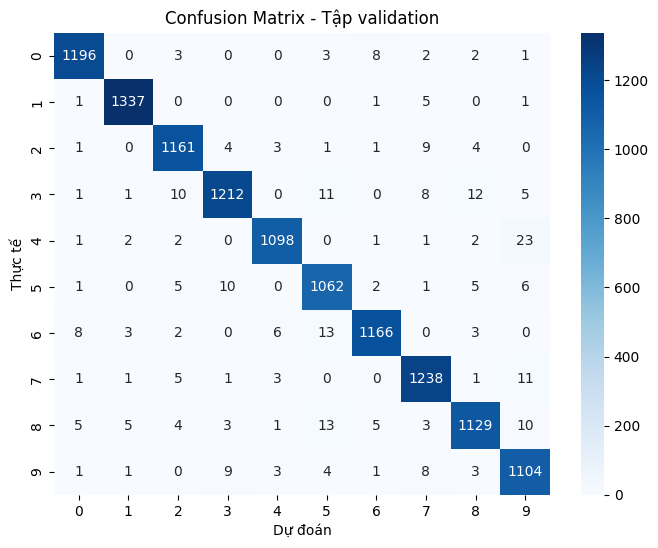

In [39]:
# Tính confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Vẽ biểu đồ heatmap thể hiện confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Tập validation")
plt.show()

Đề xuất cải thiện mô hình (không sử dụng Dropout hay tăng số epoch)
Giải pháp:
Chuyển từ mô hình mạng nơ-ron truyền thống (ANN - Artificial Neural Network) sang mạng nơ-ron tích chập (CNN - Convolutional Neural Network).

Vì sao nên chuyển sang CNN?
Hạn chế của ANN:
Mô hình ANN yêu cầu đưa ảnh đầu vào dưới dạng vector 1 chiều, tức là ảnh 28x28 pixel sẽ được "dàn phẳng" thành vector có 784 phần tử. Quá trình này làm mất đi thông tin không gian quan trọng của ảnh, như vị trí của các đường nét, góc cạnh và mối quan hệ giữa các vùng lân cận. Điều này khiến ANN khó phân biệt các chữ số có hình dáng tương tự (ví dụ: 3 và 8, 5 và 6...).

Ưu điểm của CNN:
CNN được thiết kế chuyên biệt để xử lý dữ liệu dạng hình ảnh. Thay vì dàn phẳng ảnh, CNN giữ nguyên cấu trúc 2 chiều của ảnh (28x28), nhờ đó mô hình có thể:

Nhận diện các đặc trưng hình học như đường viền, cạnh, đường cong, hoặc nét viết tay.

Học được sự khác biệt về vị trí và hình dáng giữa các chữ số.

Tận dụng các bộ lọc (filter) để trích xuất đặc trưng một cách tự động trong quá trình huấn luyện.

Cách triển khai CNN (đơn giản mà hiệu quả):
Bước 1: Thêm lớp tích chập (Conv2D) để trích xuất các đặc trưng cục bộ từ ảnh.

Bước 2: Áp dụng hàm kích hoạt ReLU để đưa phi tuyến vào mô hình.

Bước 3: Dùng lớp MaxPooling để giảm chiều dữ liệu và giữ lại đặc trưng nổi bật nhất.

Bước 4: Lặp lại một lần nữa với Conv2D + ReLU để học các đặc trưng sâu hơn.

Bước 5: Sử dụng Flatten để chuyển đặc trưng 2D thành vector 1 chiều.

Bước 6: Đưa qua một lớp Dense (ẩn) trước khi ra lớp đầu ra (10 lớp ứng với các chữ số 0–9).

👉 Kiến trúc gợi ý:
Conv2D → ReLU → MaxPooling → Conv2D → ReLU → Flatten → Dense → Output

🧪 Gợi ý bổ sung:

Thêm Batch Normalization sau các lớp tích chập để ổn định quá trình huấn luyện và tăng tốc độ hội tụ.

Dùng kỹ thuật Early Stopping để tránh overfitting mà không cần tăng số epoch.

